In [22]:
from datetime import datetime
d = datetime.now().date()
t = t.strftime('%H:%M:%S')

print("This report was generated on", d, "at", t)


This report was generated on 2017-10-05 at 23:08:21


# Zillow Prize Data Analysis Project

This Python 3 environment comes with many helpful analytics libraries installed
It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python (a modified version of this docker image will be made available as part of my project to ensure reproducibility).
For example, here's several helpful packages to load in 

Import Libraries and Data:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
### Seaborn style
sns.set_style("whitegrid")

Input data files are available in the "../input/" directory.

Any results I write to the current directory are saved as output.

In [3]:
## Dictionary of feature dtypes
ints = ['parcelid']

floats = ['basementsqft', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'finishedfloor1squarefeet', 
          'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13',
          'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt',
          'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'latitude', 'longitude',
          'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'roomcnt', 'threequarterbathnbr', 'unitcnt',
          'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'numberofstories',
          'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
          'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyyear']

objects = ['airconditioningtypeid', 'architecturalstyletypeid', 'buildingclasstypeid',
           'buildingqualitytypeid', 'decktypeid', 'fips', 'hashottuborspa', 'heatingorsystemtypeid',
           'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertycountylandusecode',
           'propertylandusetypeid', 'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
           'regionidcounty', 'regionidneighborhood', 'regionidzip', 'storytypeid',
           'typeconstructiontypeid', 'fireplaceflag', 'taxdelinquencyflag', 'censustractandblock']

feature_dtypes = {col: col_type for type_list, col_type in zip([ints, floats, objects],
                                                               ['int64', 'float64', 'object']) 
                                  for col in type_list}

In [5]:
### Let's import our data
data = pd.read_csv('./input/properties_2016.csv' , dtype = feature_dtypes)
### and test if everything OK
data.head()

parcelid airconditioningtypeid architecturalstyletypeid  basementsqft  \
0  10754147                   NaN                      NaN           NaN   
1  10759547                   NaN                      NaN           NaN   
2  10843547                   NaN                      NaN           NaN   
3  10859147                   NaN                      NaN           NaN   
4  10879947                   NaN                      NaN           NaN   

   bathroomcnt  bedroomcnt buildingclasstypeid buildingqualitytypeid  \
0          0.0         0.0                 NaN                   NaN   
1          0.0         0.0                 NaN                   NaN   
2          0.0         0.0                 NaN                   NaN   
3          0.0         0.0                   3                     7   
4          0.0         0.0                   4                   NaN   

   calculatedbathnbr decktypeid         ...           numberofstories  \
0                NaN        NaN         ...                       NaN   
1                NaN        NaN         ...                       NaN   
2                NaN        NaN         ...                       NaN   
3                NaN        NaN         ...                       1.0   
4                NaN        NaN         ...                       NaN   

   fireplaceflag  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
0            NaN                         NaN                9.0   
1            NaN                         NaN            27516.0   
2            NaN                    650756.0          1413387.0   
3            NaN                    571346.0          1156834.0   
4            NaN                    193796.0           433491.0   

   assessmentyear  landtaxvaluedollarcnt  taxamount taxdelinquencyflag  \
0          2015.0                    9.0        NaN                NaN   
1          2015.0                27516.0        NaN                NaN   
2          2015.0               762631.0   20800.37                NaN   
3          2015.0               585488.0   14557.57                NaN   
4          2015.0               239695.0    5725.17                NaN   

   taxdelinquencyyear  censustractandblock  
0                 NaN                  NaN  
1                 NaN                  NaN  
2                 NaN                  NaN  
3                 NaN                  NaN  
4                 NaN                  NaN  

[5 rows x 58 columns]

In [6]:
continuous = ['basementsqft', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 
              'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
              'finishedsquarefeet50', 'finishedsquarefeet6', 'garagetotalsqft', 'latitude',
              'longitude', 'lotsizesquarefeet', 'poolsizesum',  'yardbuildingsqft17',
              'yardbuildingsqft26', 'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
              'landtaxvaluedollarcnt', 'taxamount']

discrete = ['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'fireplacecnt', 'fullbathcnt',
            'garagecarcnt', 'poolcnt', 'roomcnt', 'threequarterbathnbr', 'unitcnt',
            'numberofstories', 'assessmentyear', 'taxdelinquencyyear']

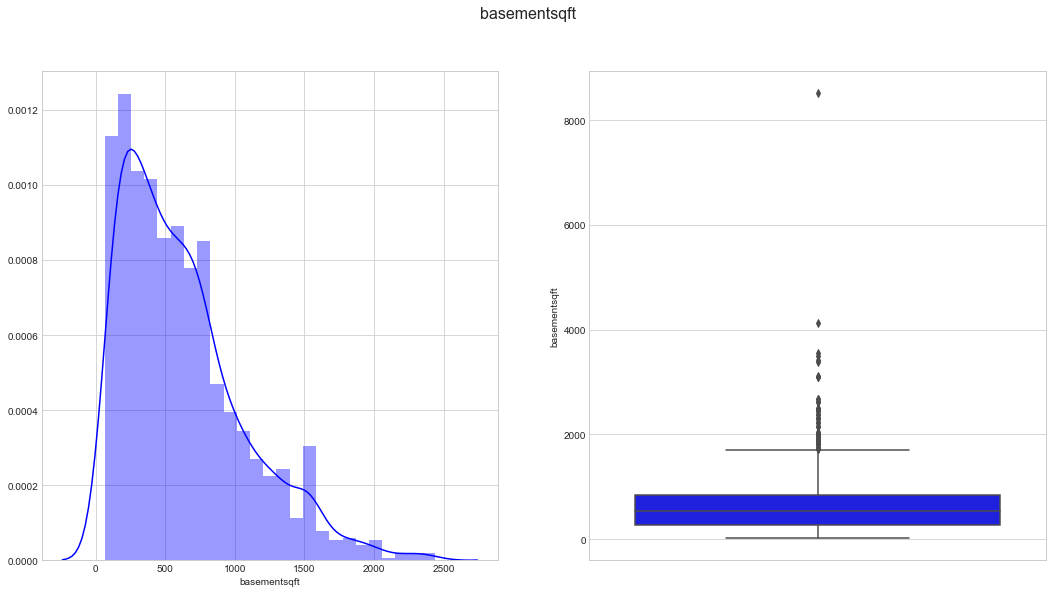

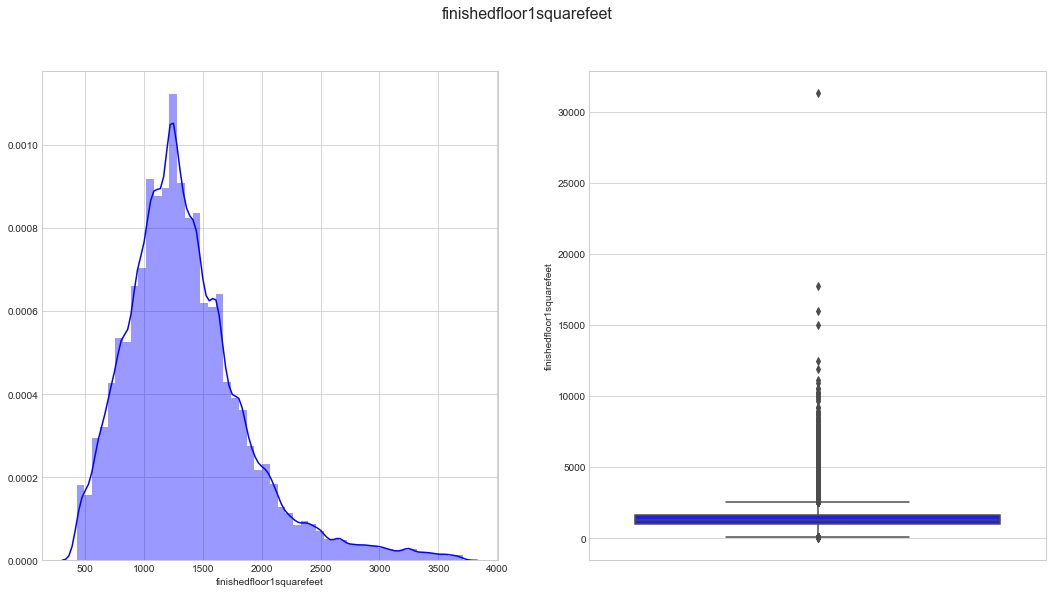

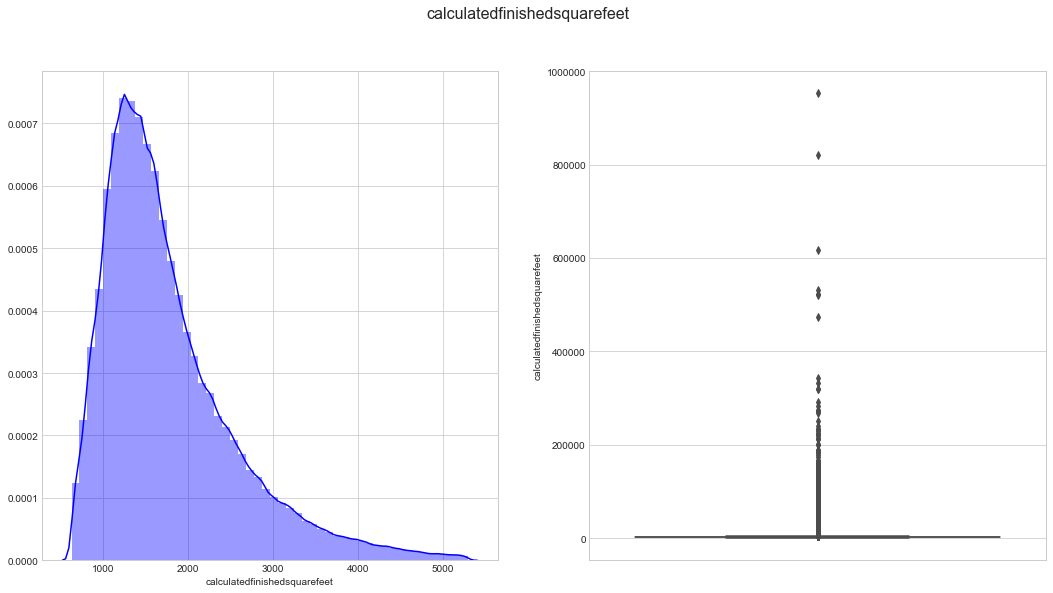

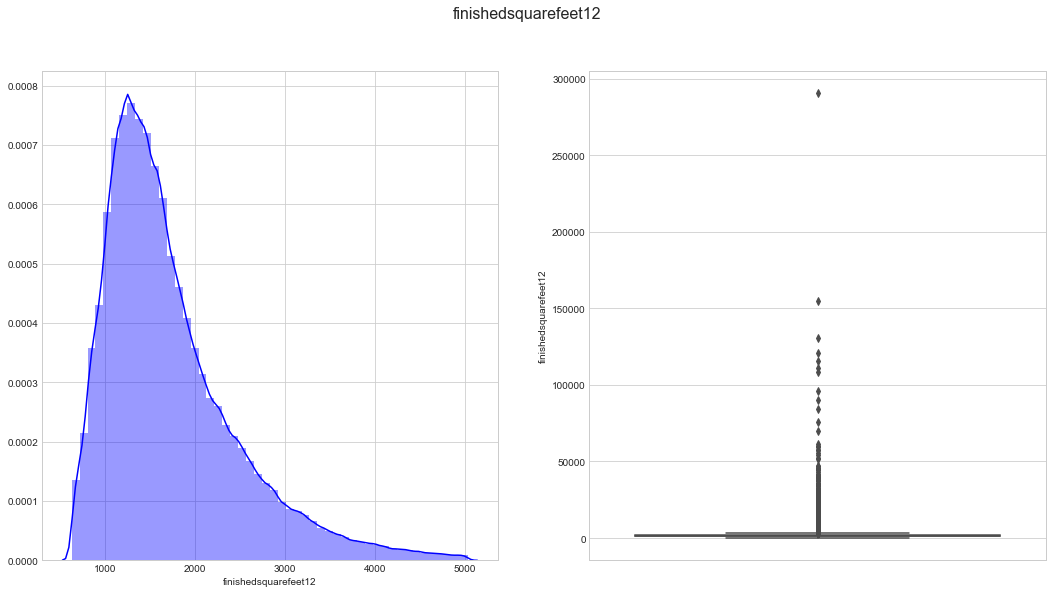

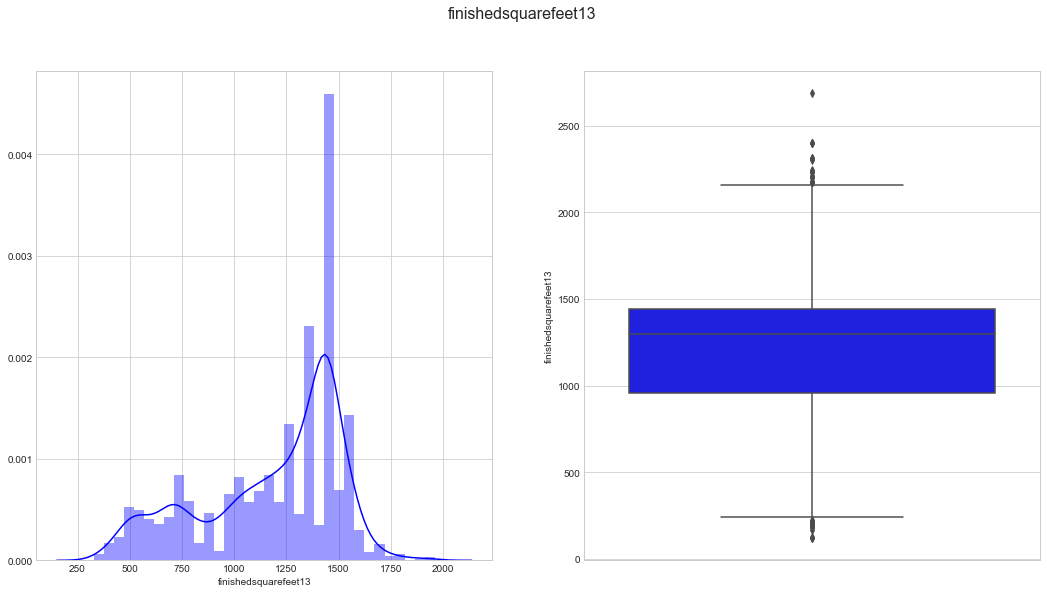

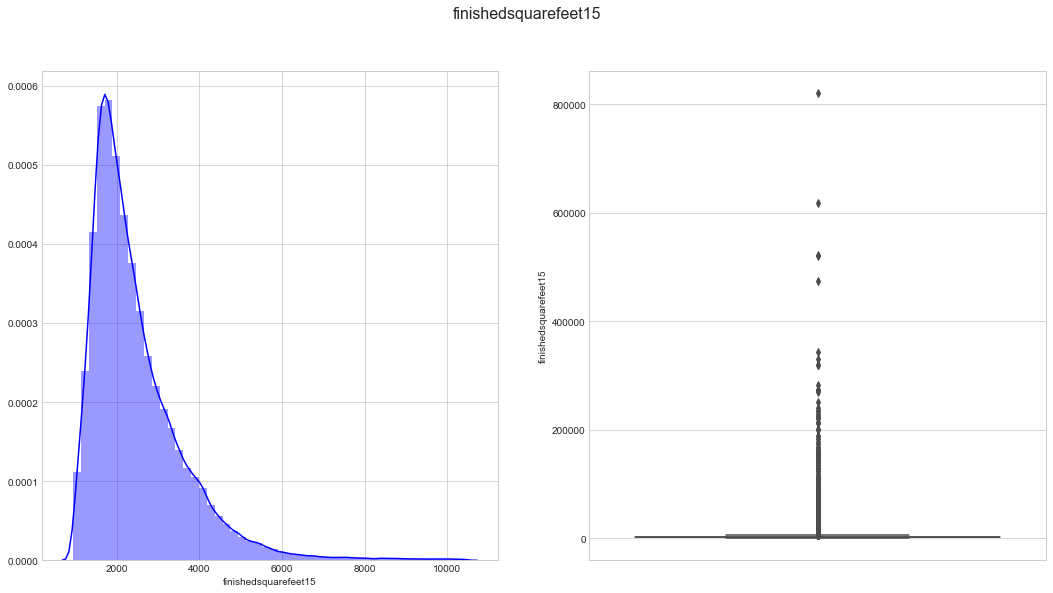

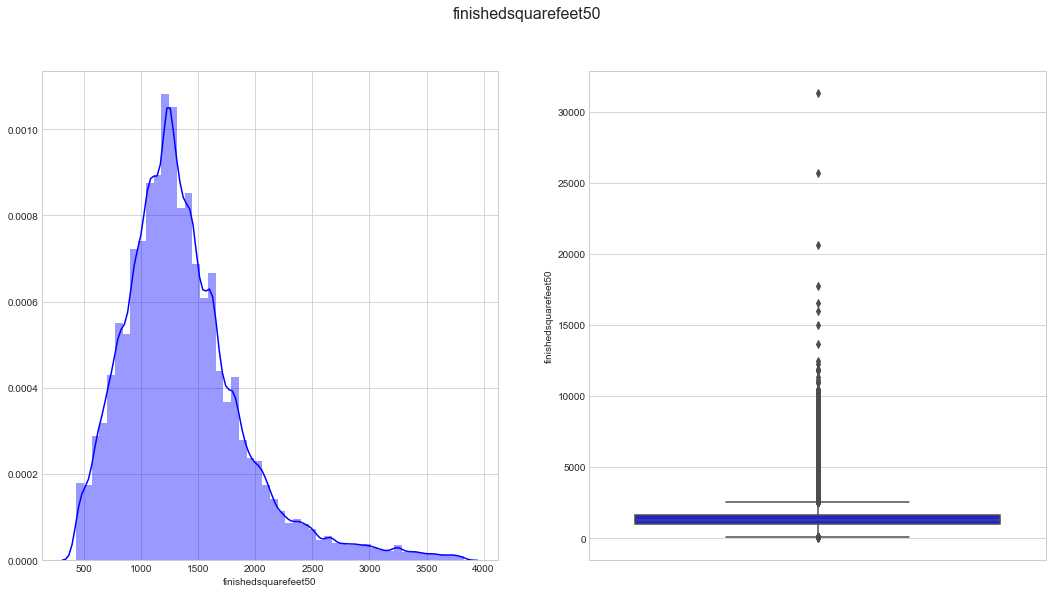

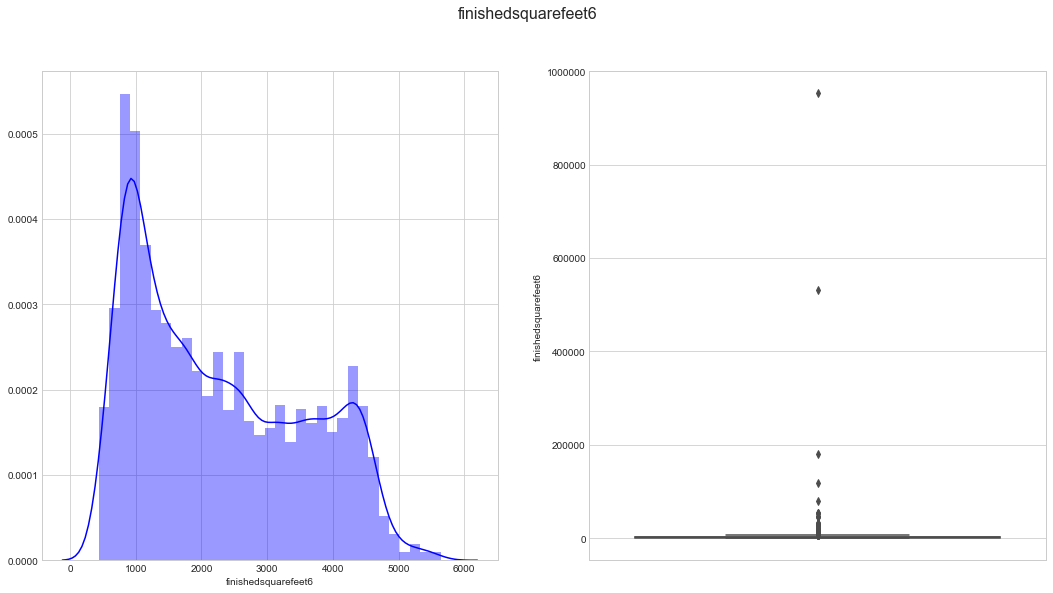

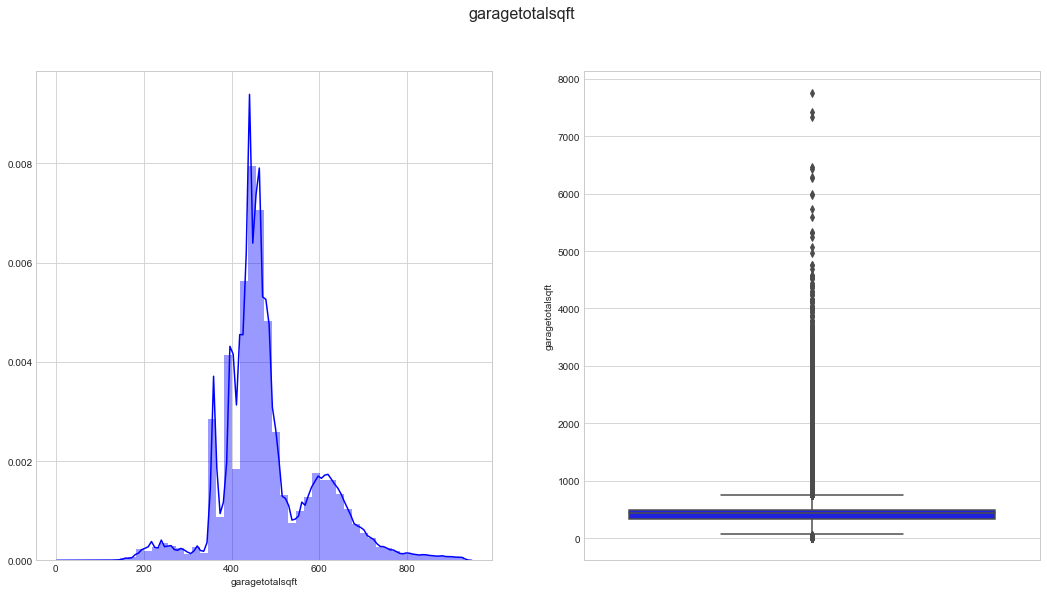

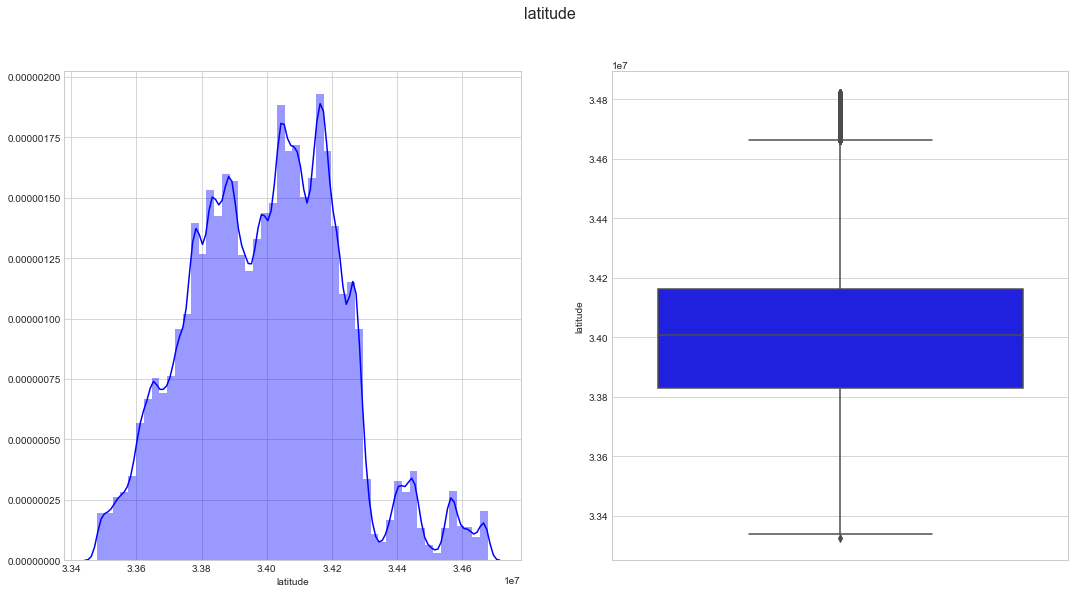

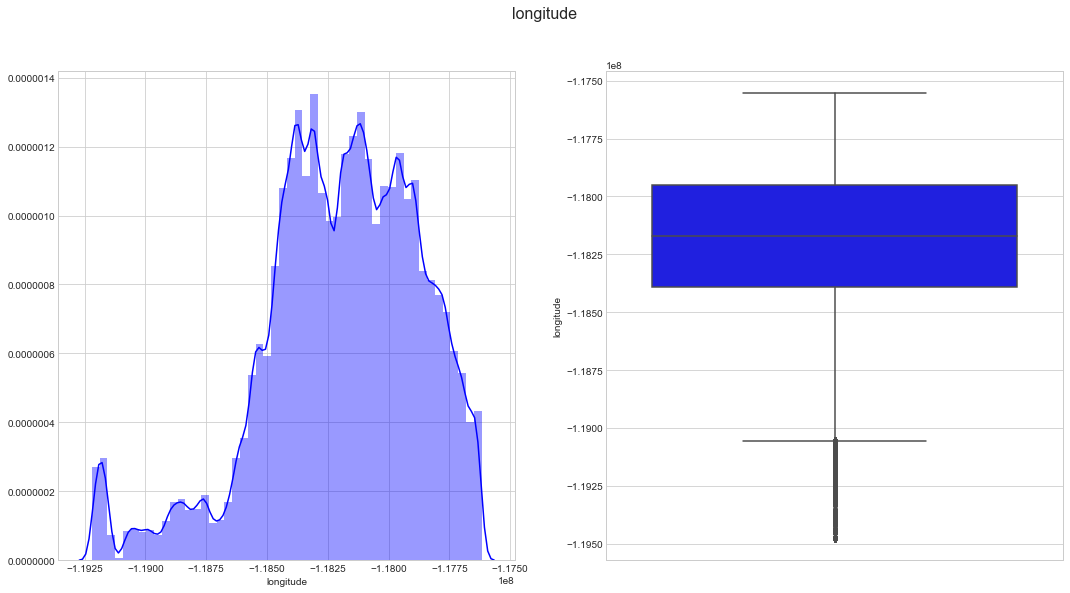

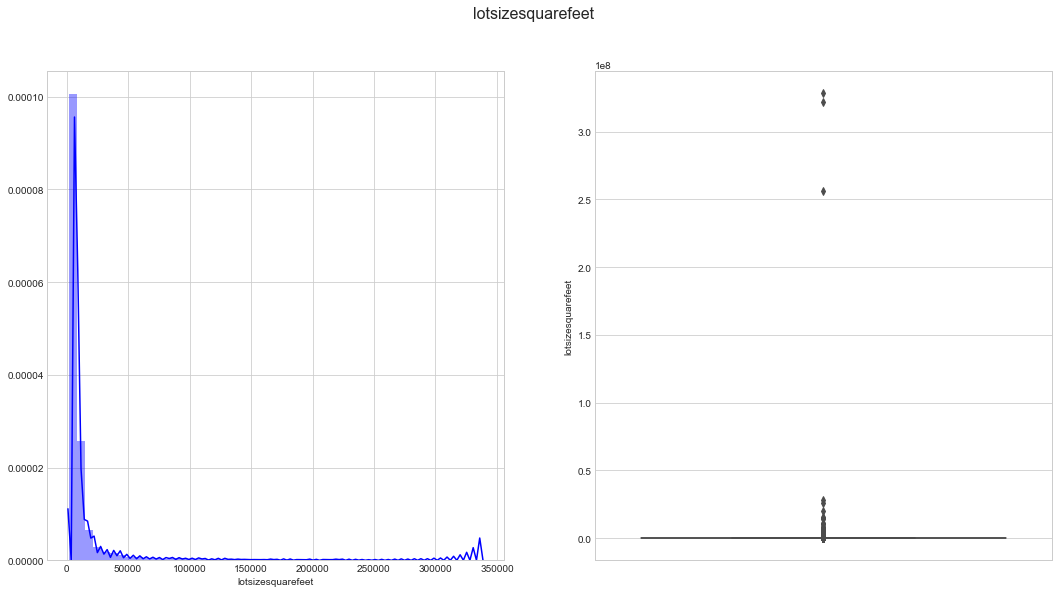

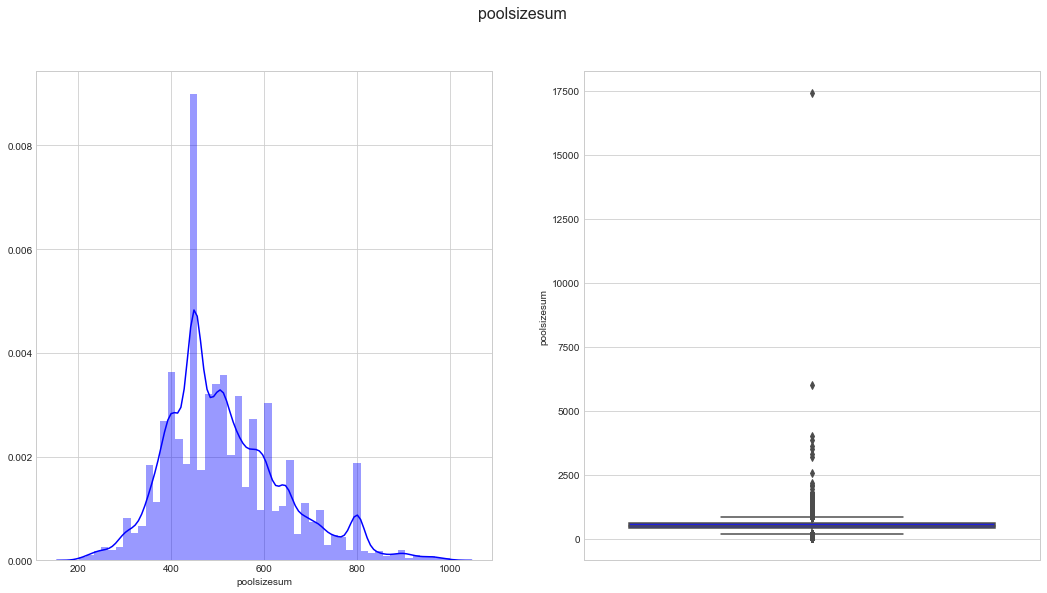

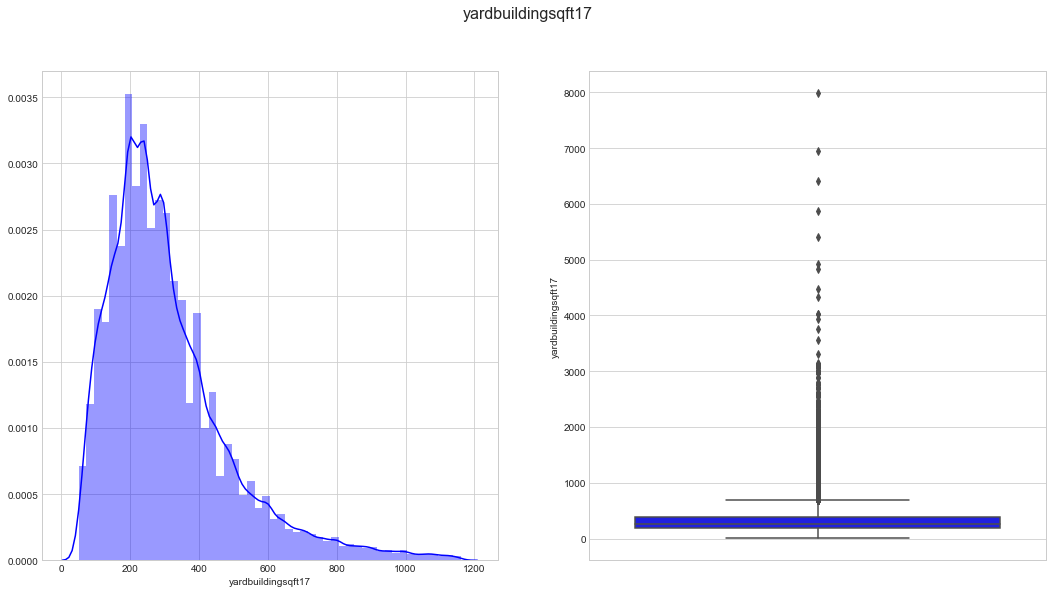

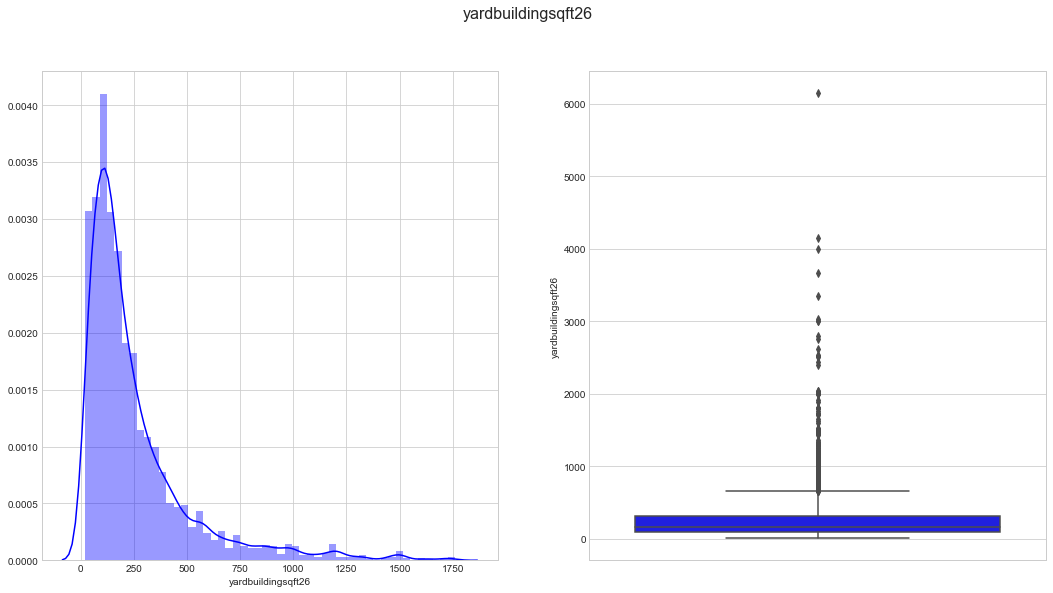

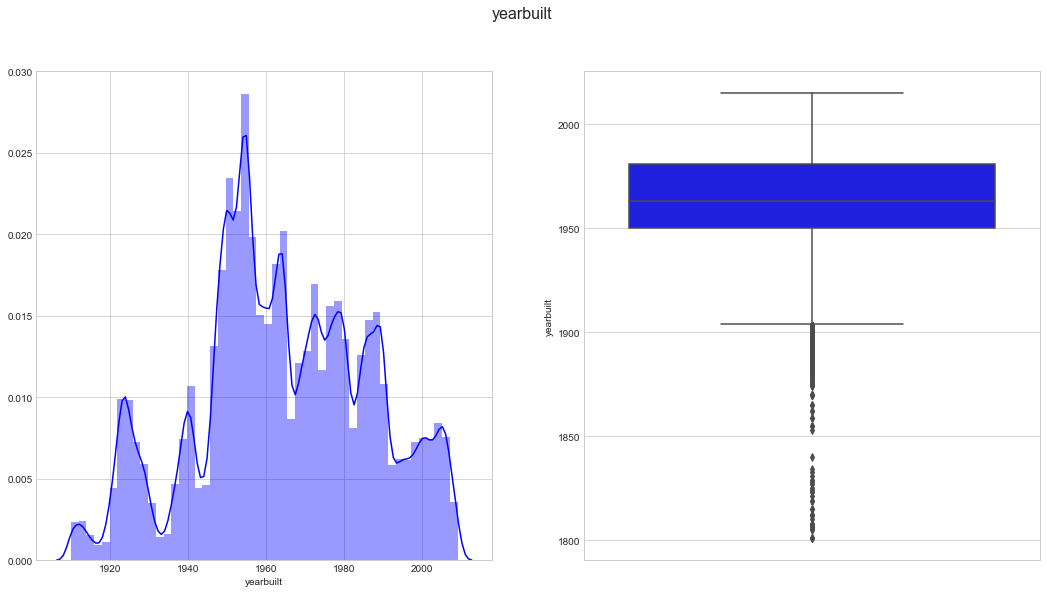

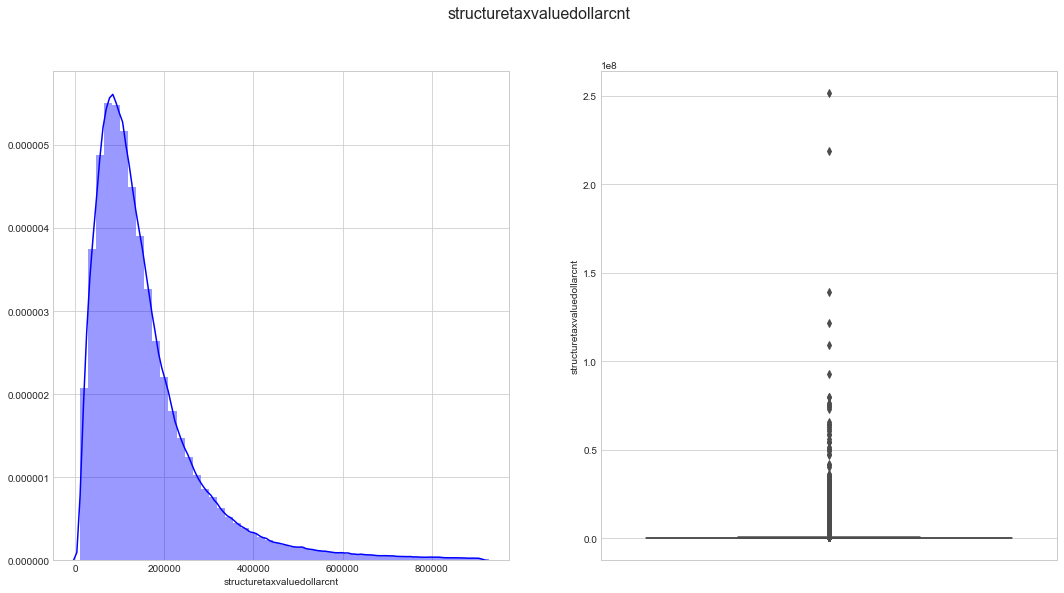

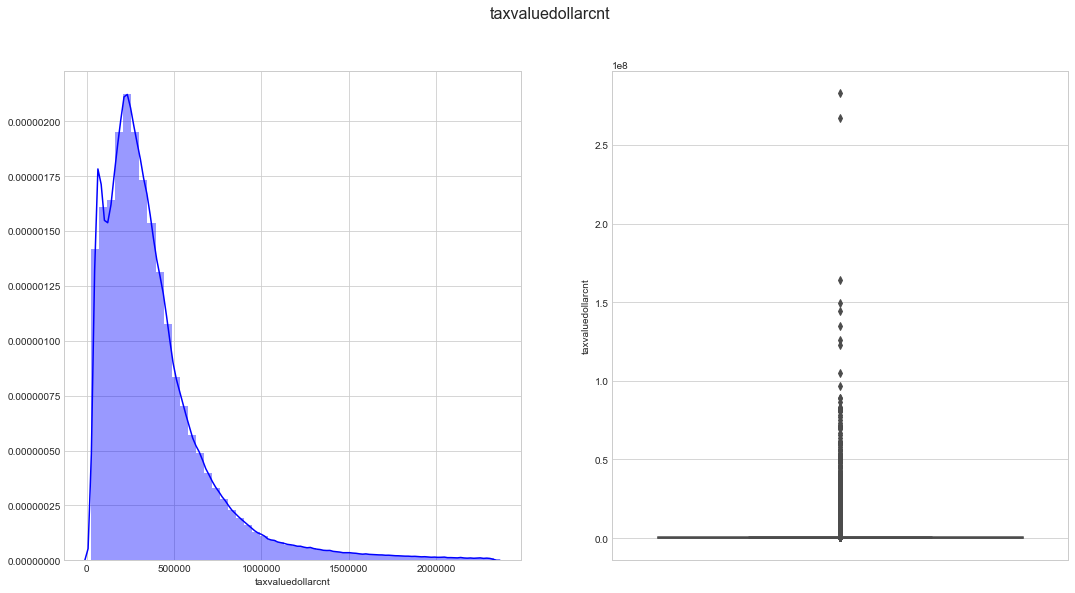

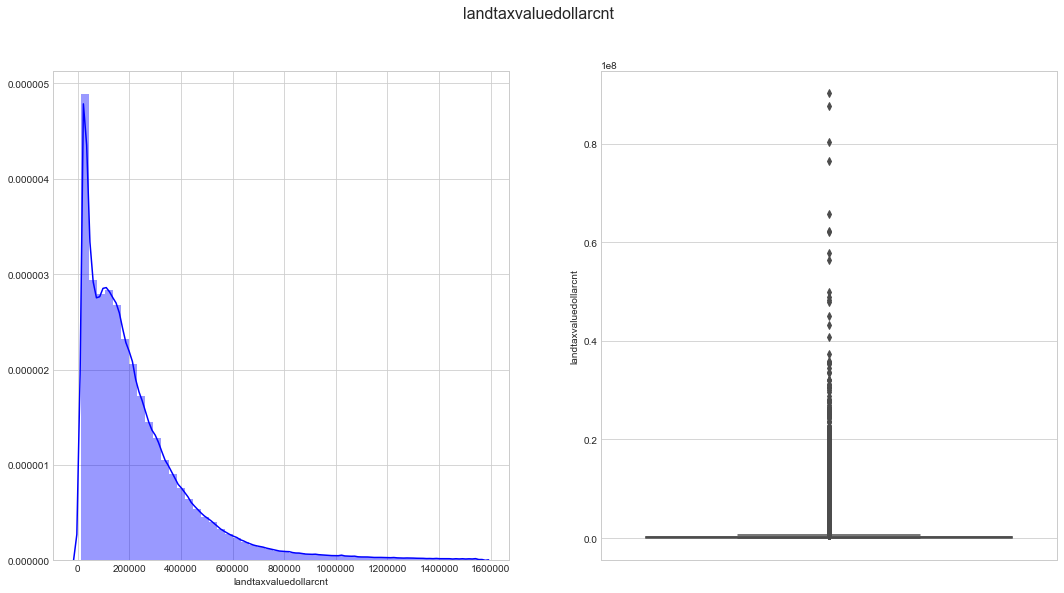

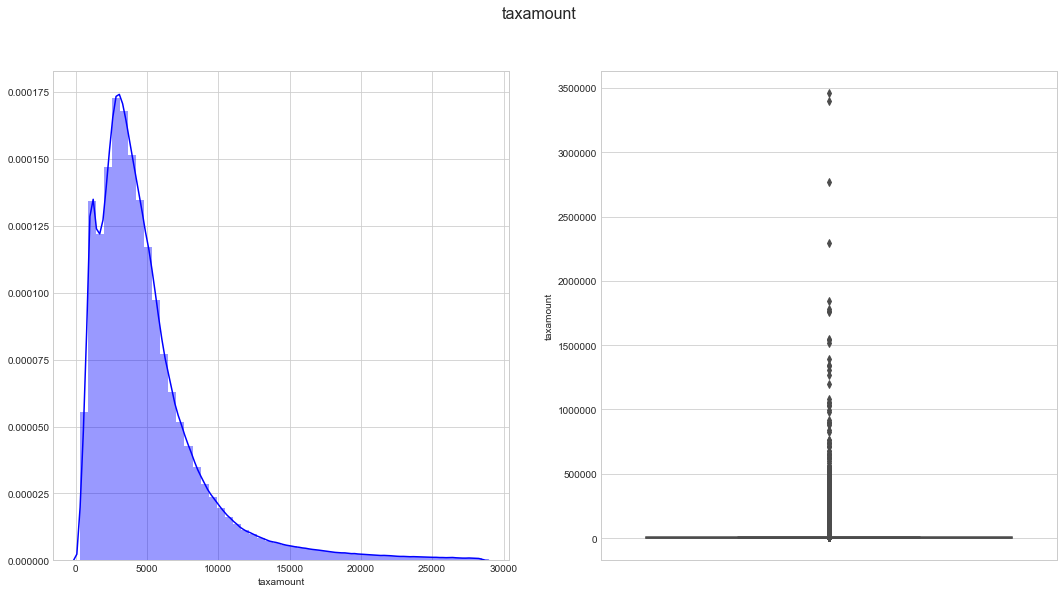

In [10]:
### Continuous variable plots
for col in continuous:
    values = data[col].dropna()
    lower = np.percentile(values, 1)
    upper = np.percentile(values, 99)
    fig = plt.figure(figsize=(18,9));
    sns.distplot(values[(values>lower) & (values<upper)], color='Blue', ax = plt.subplot(121));
    sns.boxplot(y=values, color='Blue', ax = plt.subplot(122));
    plt.suptitle(col, fontsize=16)       

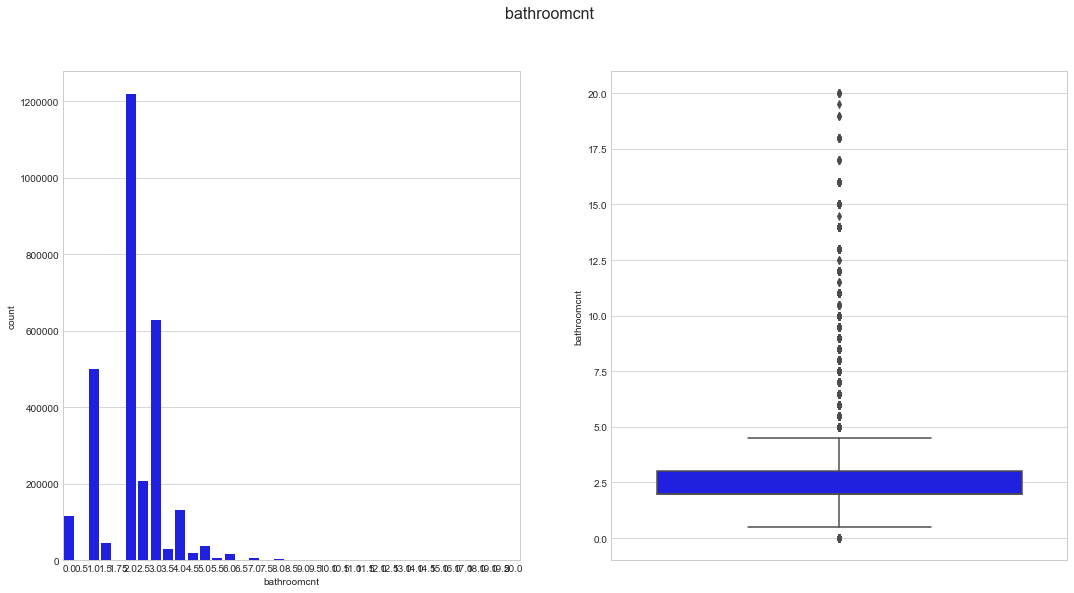

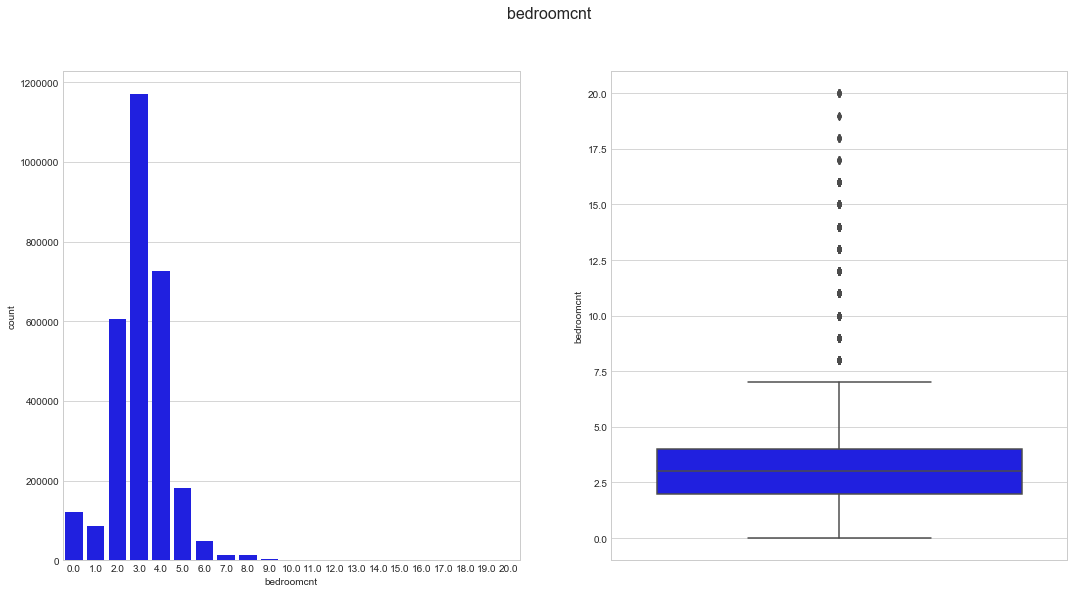

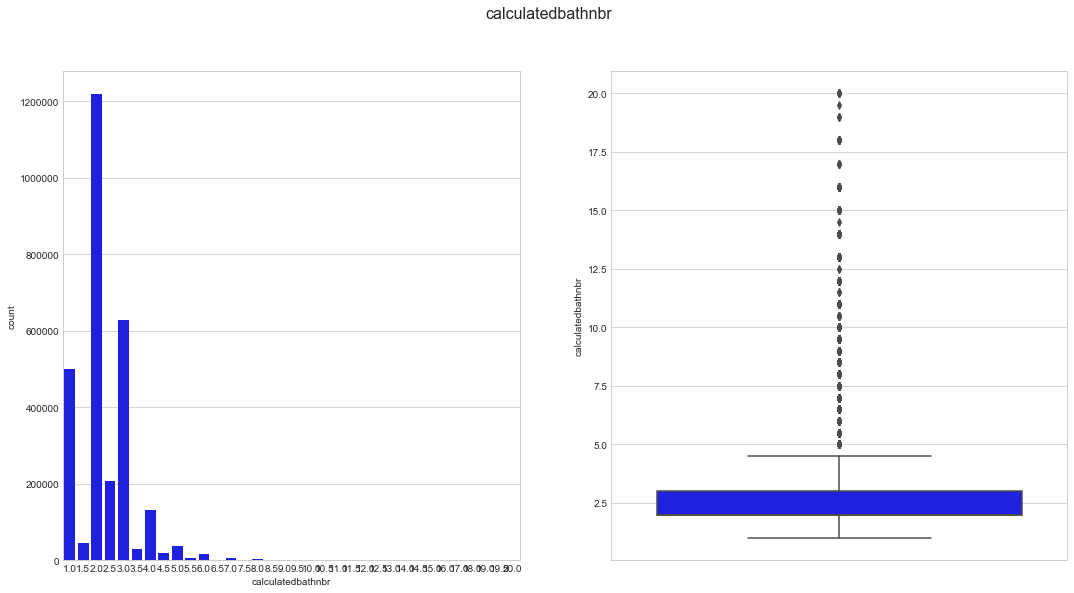

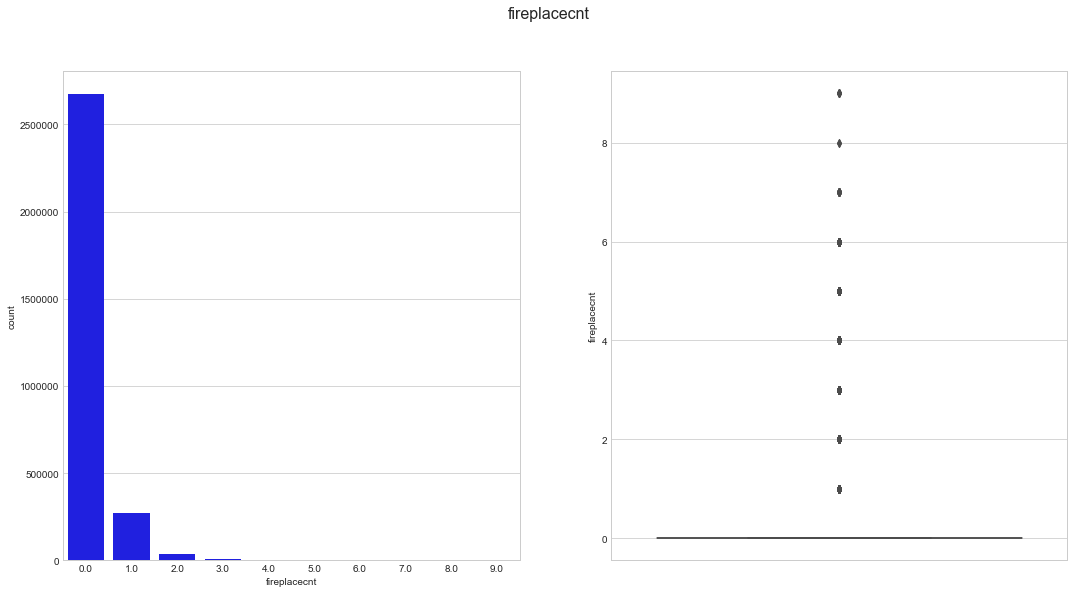

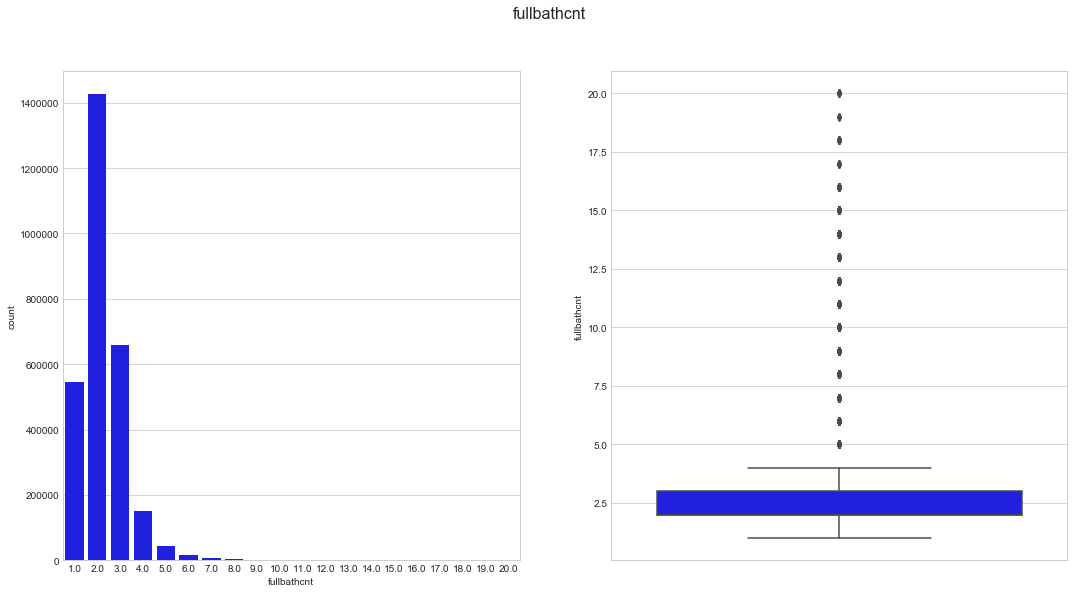

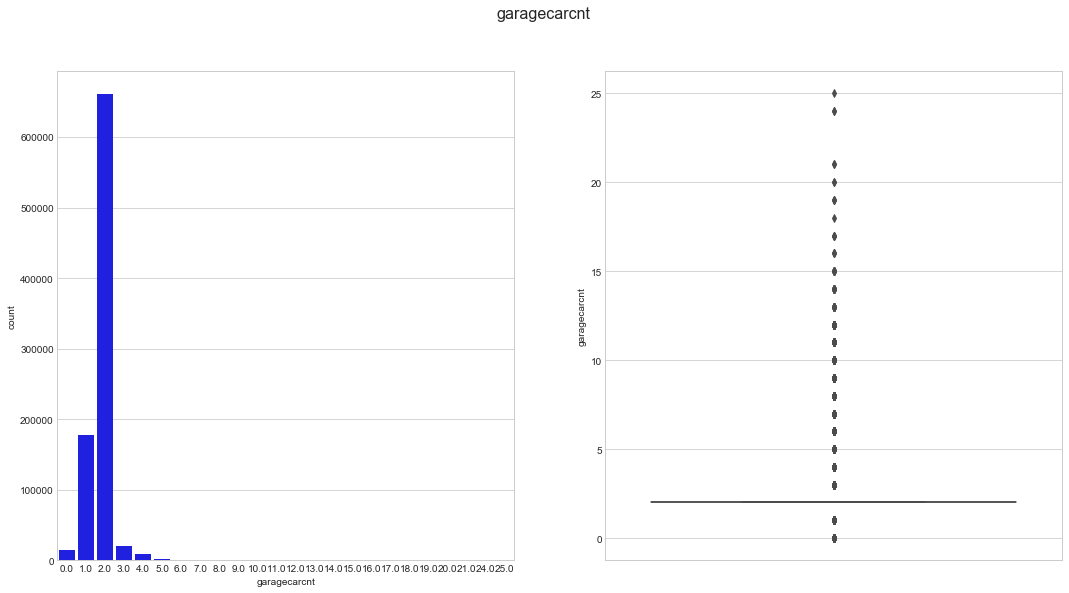

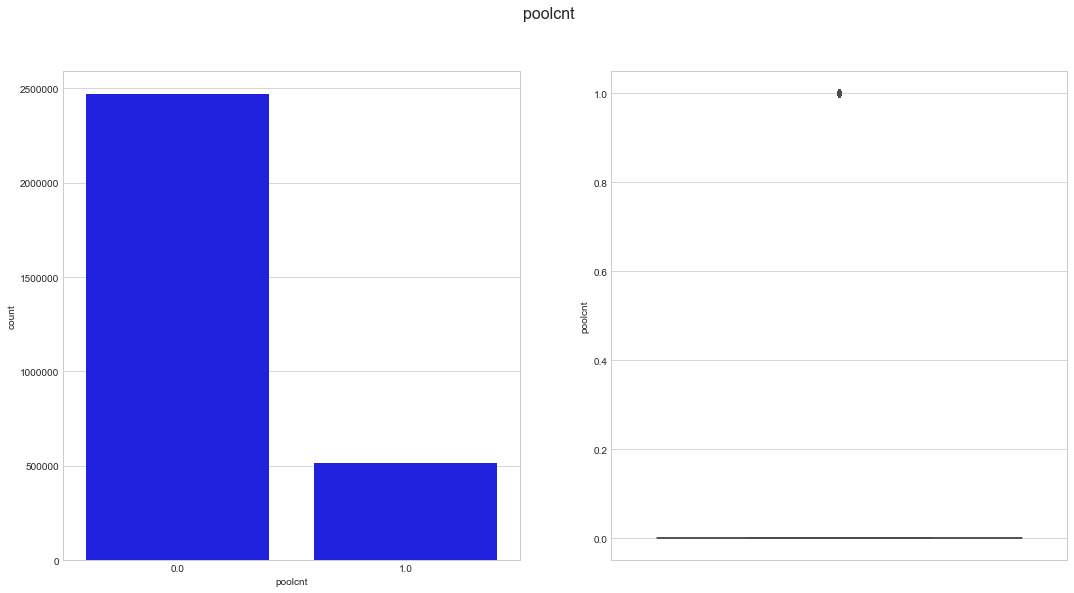

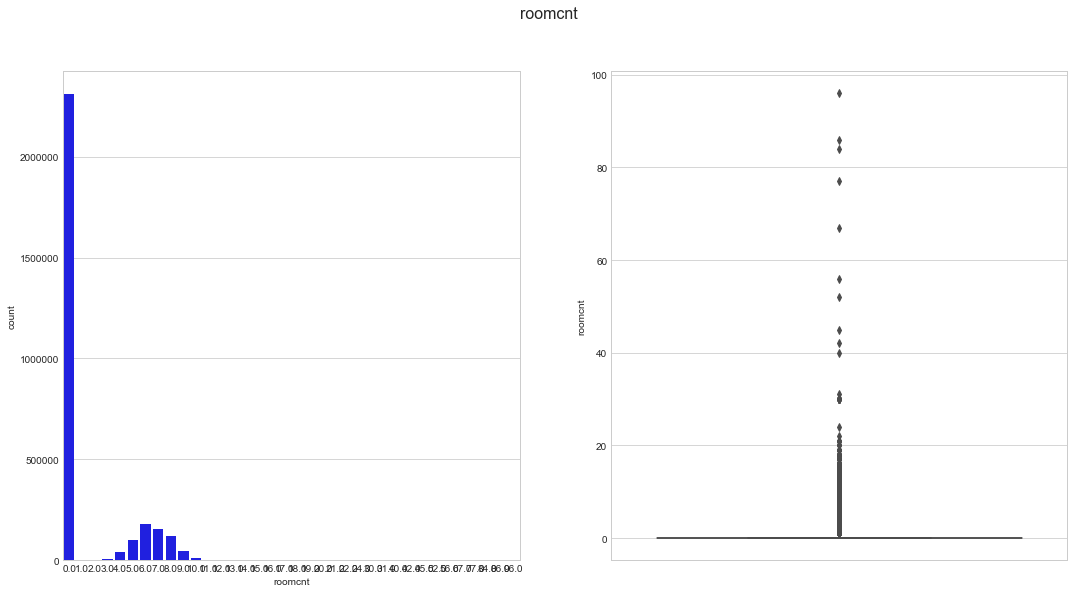

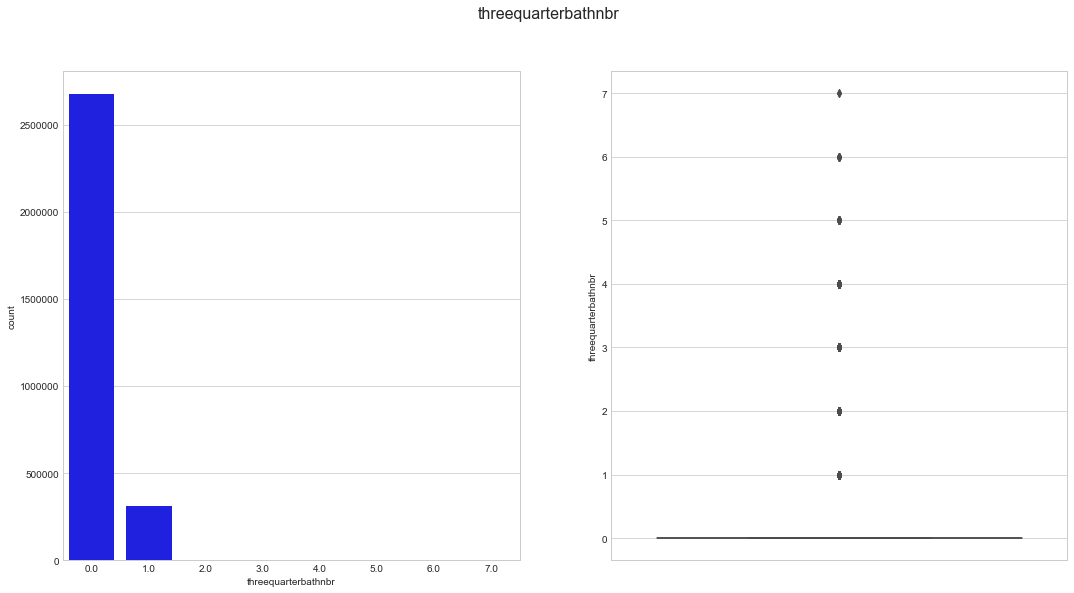

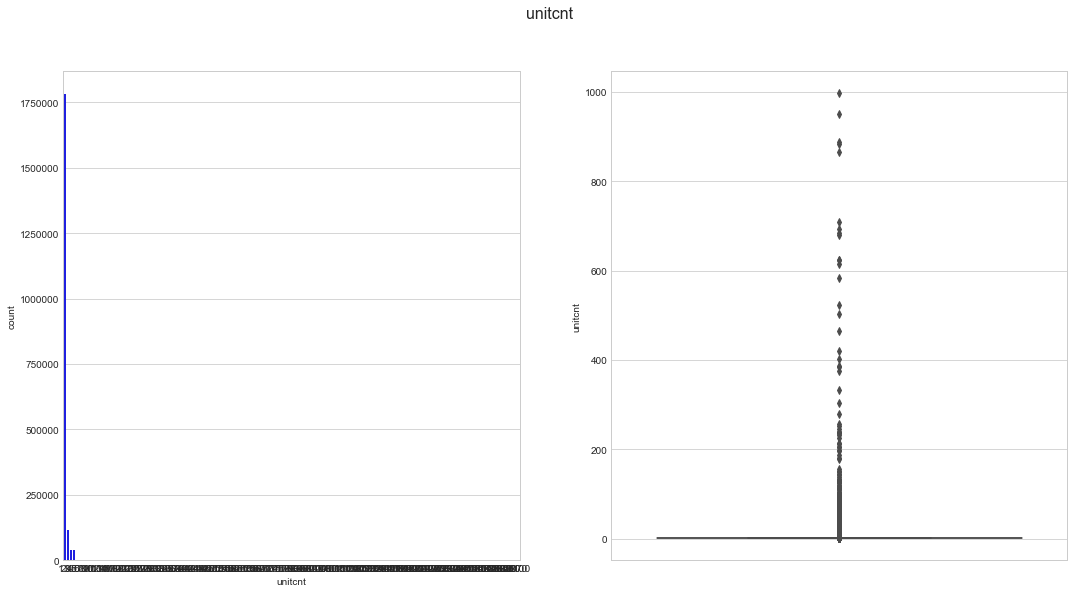

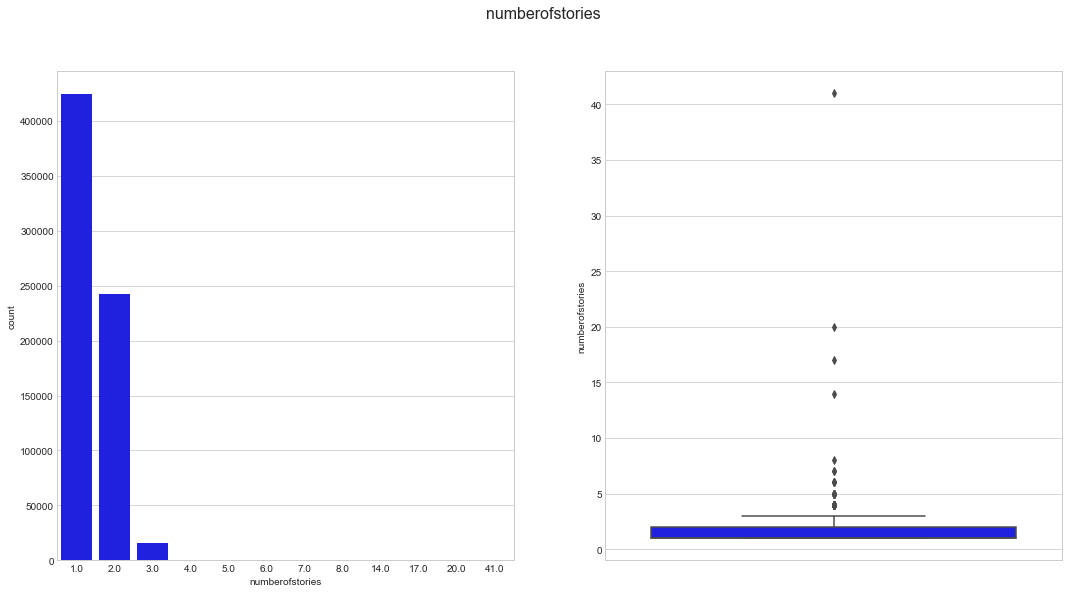

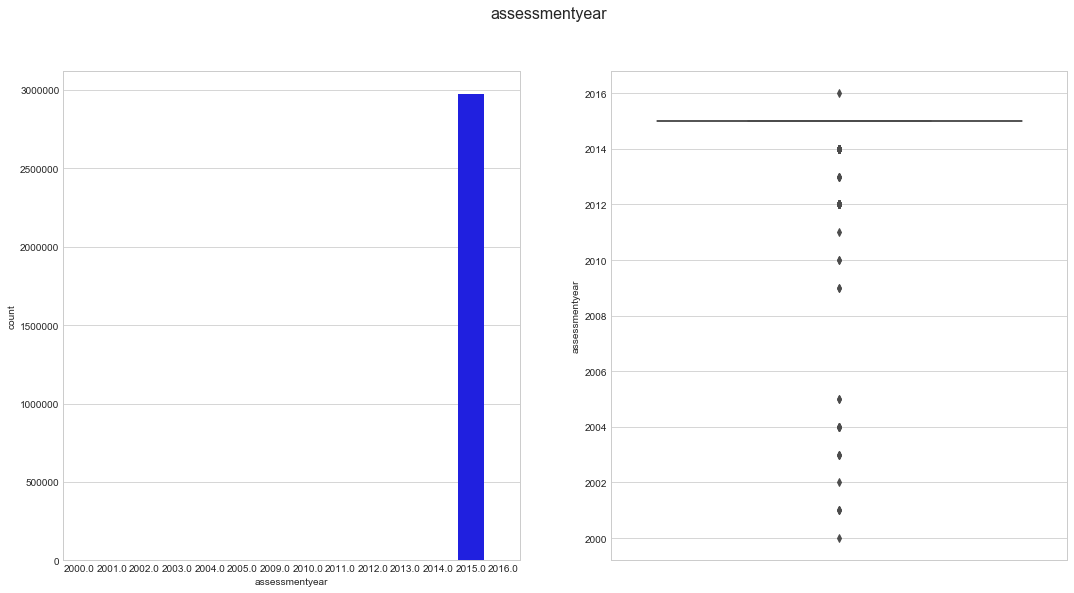

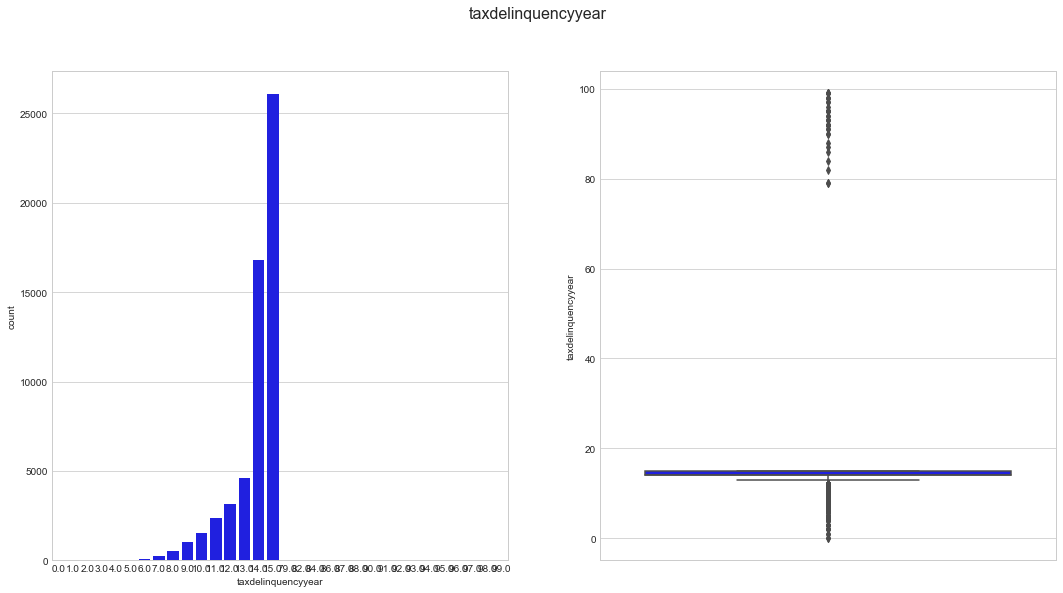

In [9]:
### Discrete variable plots
NanAsZero = ['fireplacecnt', 'poolcnt', 'threequarterbathnbr']
for col in discrete:
    if col in NanAsZero:
        data[col].fillna(0, inplace=True)
    values = data[col].dropna()   
    fig = plt.figure(figsize=(18,9));
    sns.countplot(x=values, color='Blue', ax = plt.subplot(121));
    sns.boxplot(y=values, color='Blue', ax = plt.subplot(122));
    plt.suptitle(col, fontsize=16)

In [14]:
### Reading train file
errors = pd.read_csv('./input/train_2016_v2.csv', parse_dates=['transactiondate'])
errors.head()

parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02

In [15]:
#### Merging tables
data_sold = data.merge(errors, how='inner', on='parcelid')
data_sold.head()

parcelid airconditioningtypeid architecturalstyletypeid  basementsqft  \
0  17073783                   NaN                      NaN           NaN   
1  17088994                   NaN                      NaN           NaN   
2  17100444                   NaN                      NaN           NaN   
3  17102429                   NaN                      NaN           NaN   
4  17109604                   NaN                      NaN           NaN   

   bathroomcnt  bedroomcnt buildingclasstypeid buildingqualitytypeid  \
0          2.5         3.0                 NaN                   NaN   
1          1.0         2.0                 NaN                   NaN   
2          2.0         3.0                 NaN                   NaN   
3          1.5         2.0                 NaN                   NaN   
4          2.5         4.0                 NaN                   NaN   

   calculatedbathnbr decktypeid       ...         structuretaxvaluedollarcnt  \
0                2.5        NaN       ...                           115087.0   
1                1.0        NaN       ...                           143809.0   
2                2.0        NaN       ...                            33619.0   
3                1.5        NaN       ...                            45609.0   
4                2.5        NaN       ...                           277000.0   

   taxvaluedollarcnt  assessmentyear  landtaxvaluedollarcnt  taxamount  \
0           191811.0          2015.0                76724.0    2015.06   
1           239679.0          2015.0                95870.0    2581.30   
2            47853.0          2015.0                14234.0     591.64   
3            62914.0          2015.0                17305.0     682.78   
4           554000.0          2015.0               277000.0    5886.92   

   taxdelinquencyflag  taxdelinquencyyear censustractandblock  logerror  \
0                 NaN                 NaN      61110022003007    0.0953   
1                 NaN                 NaN      61110015031002    0.0198   
2                 NaN                 NaN      61110007011007    0.0060   
3                 NaN                 NaN      61110008002013   -0.0566   
4                 NaN                 NaN      61110014021007    0.0573   

   transactiondate  
0       2016-01-27  
1       2016-03-30  
2       2016-05-27  
3       2016-06-07  
4       2016-08-08  

[5 rows x 60 columns]

In [16]:
### Creating 5 equal size logerror bins 
data_sold['logerror_bin'] = pd.qcut(data_sold['logerror'], 5, 
                                    labels=['Large Negative Error', 'Medium Negative Error',
                                            'Small Error', 'Medium Positive Error',
                                            'Large Positive Error'])
print(data_sold.logerror_bin.value_counts())

Large Negative Error     18442
Small Error              18432
Medium Negative Error    17973
Large Positive Error     17947
Medium Positive Error    17481
Name: logerror_bin, dtype: int64


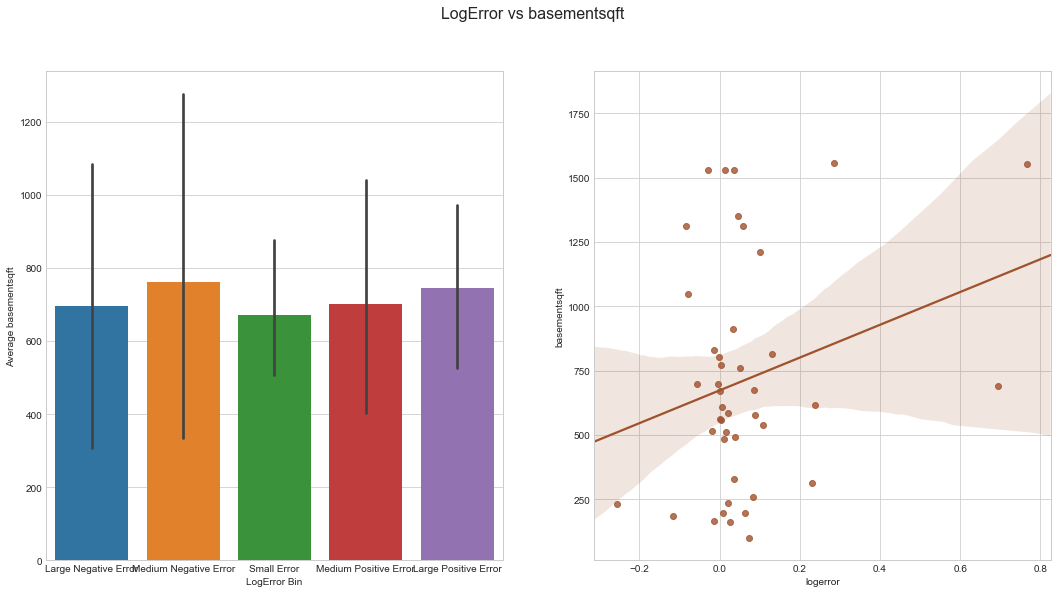

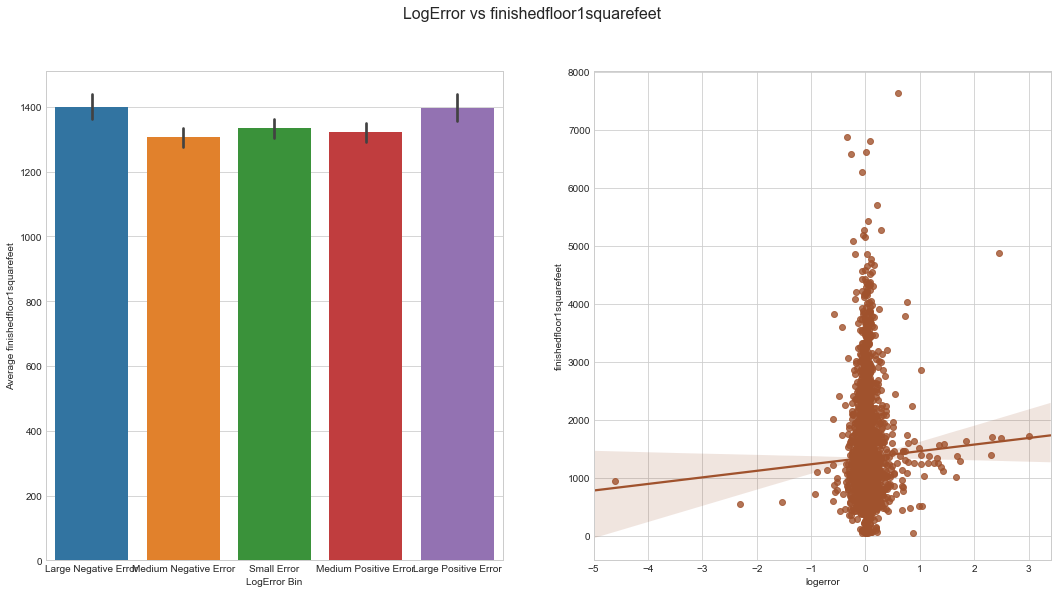

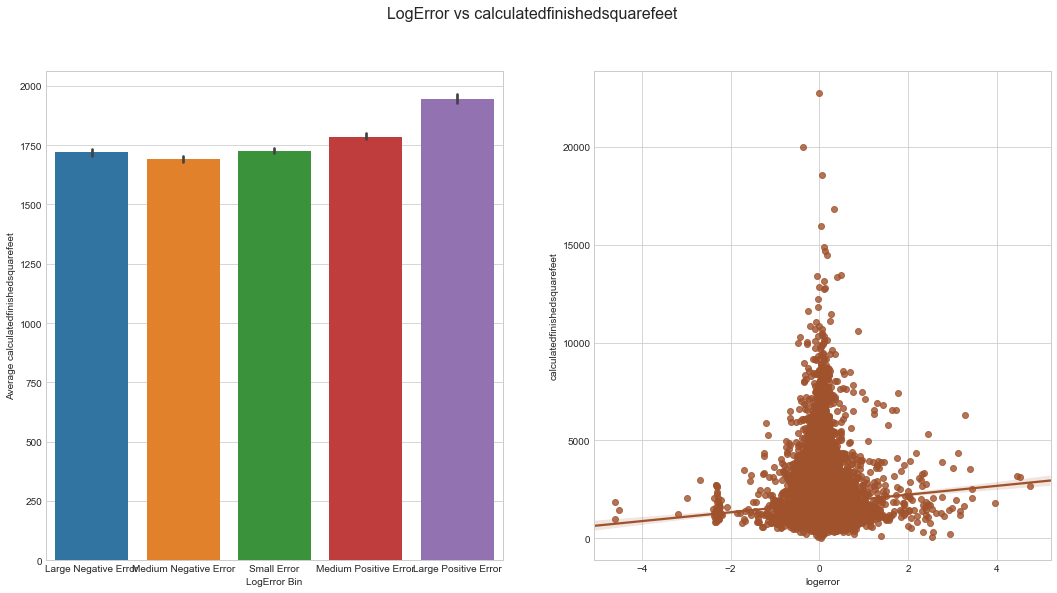

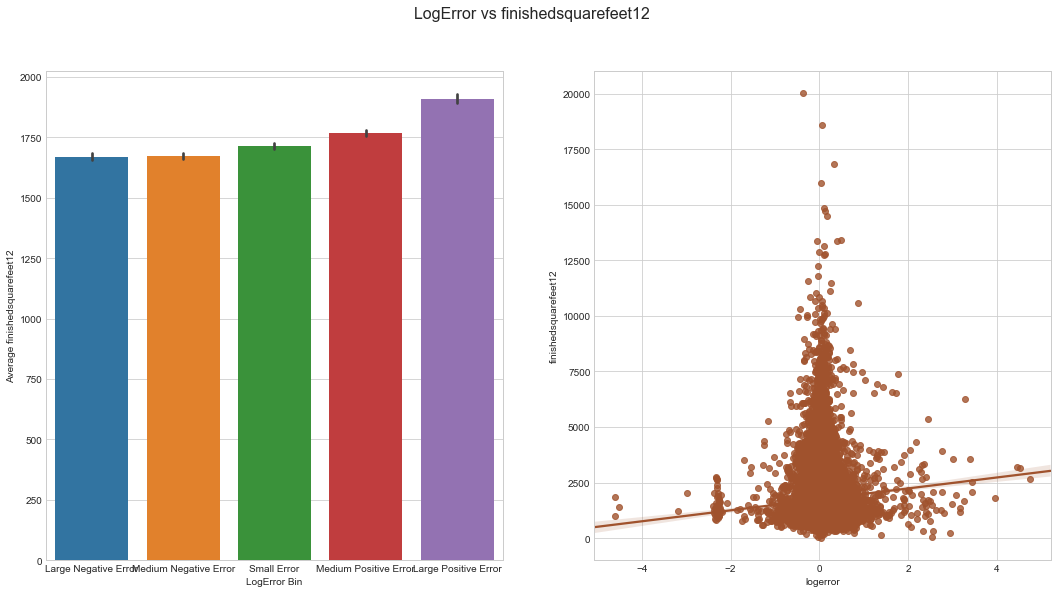

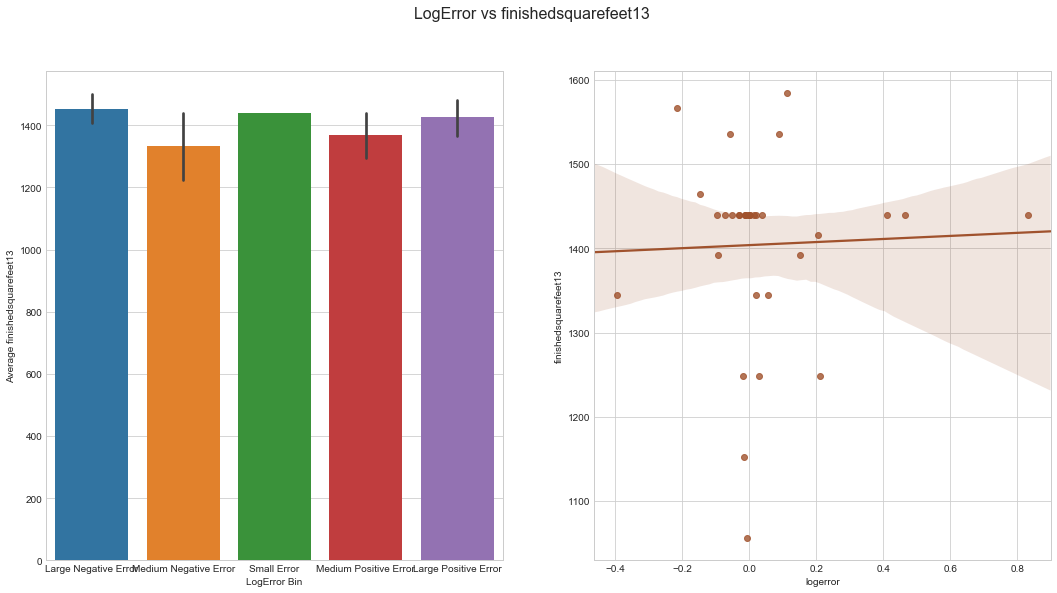

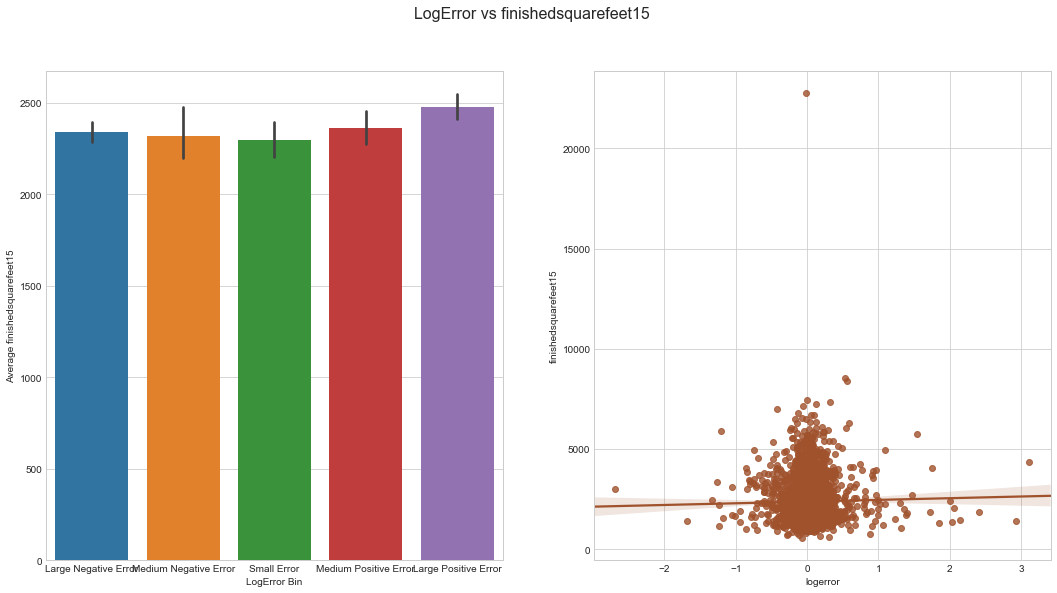

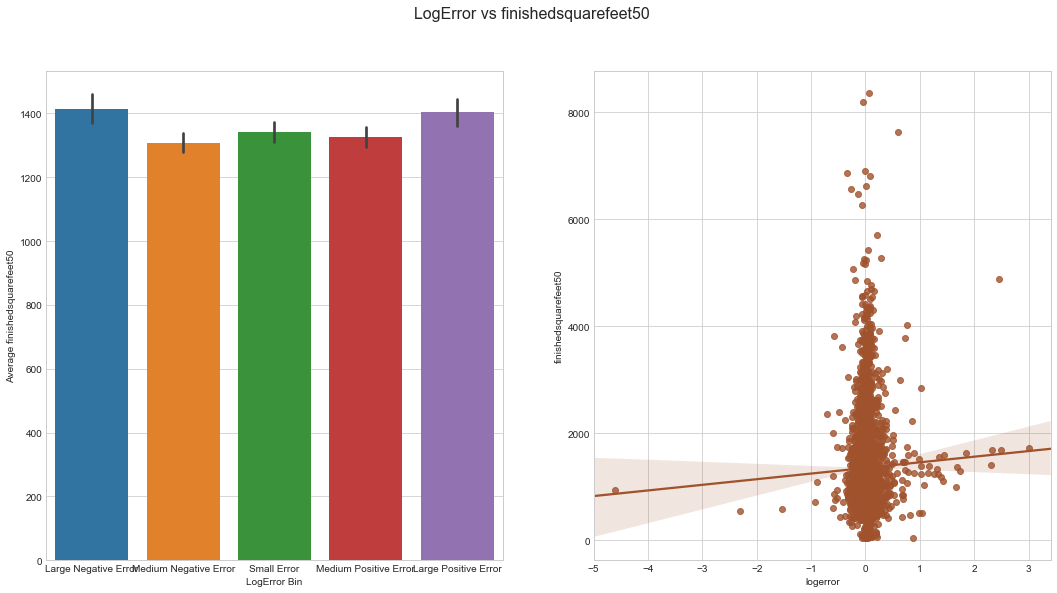

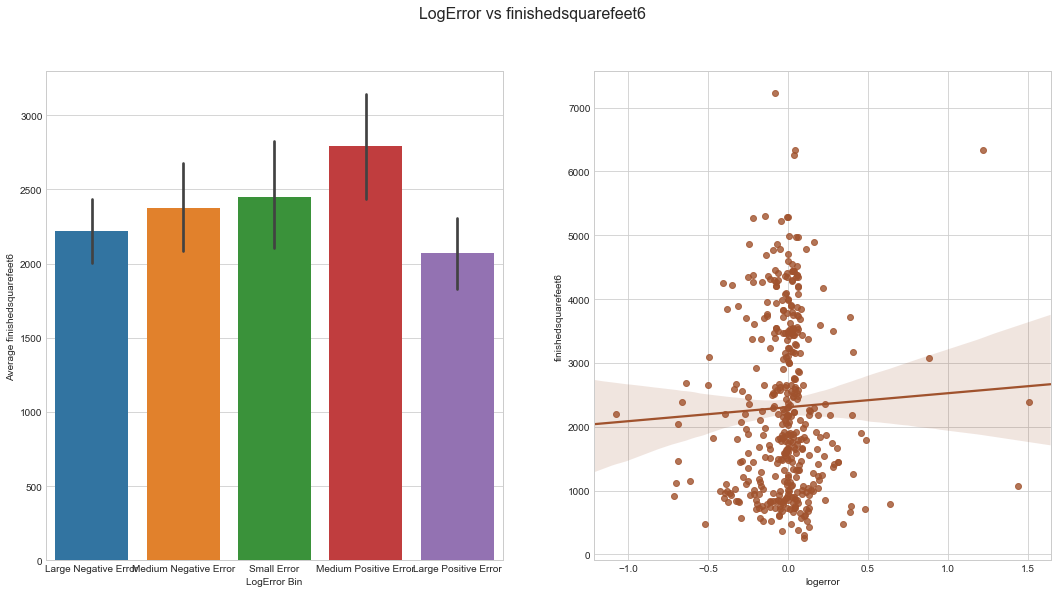

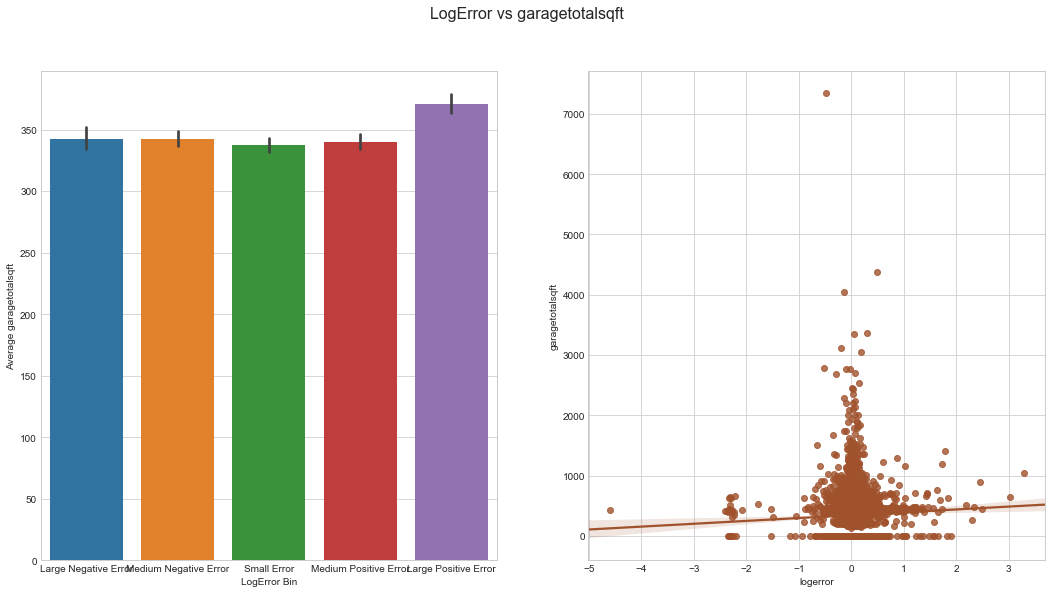

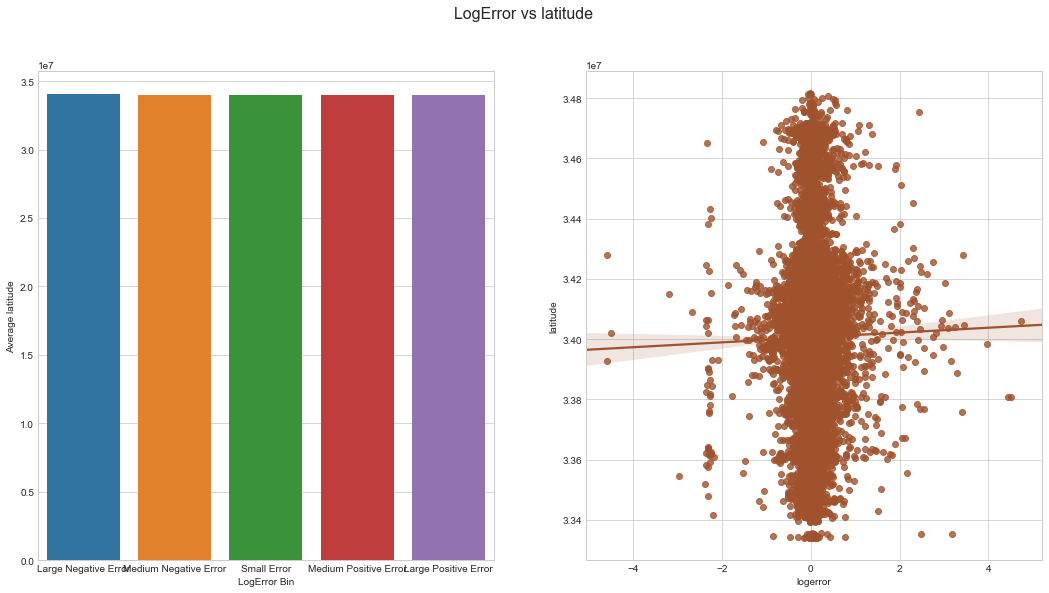

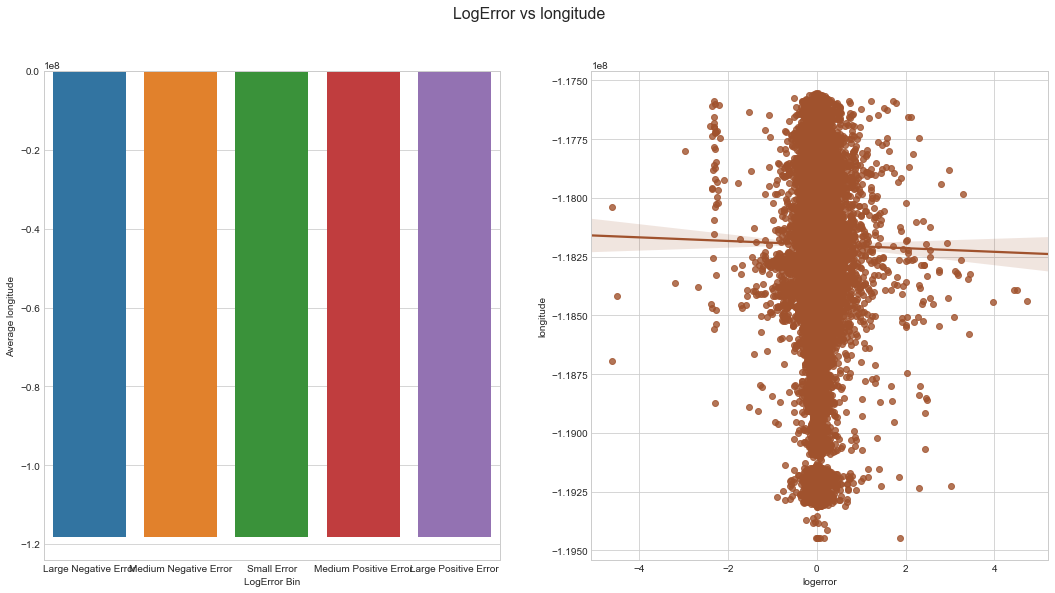

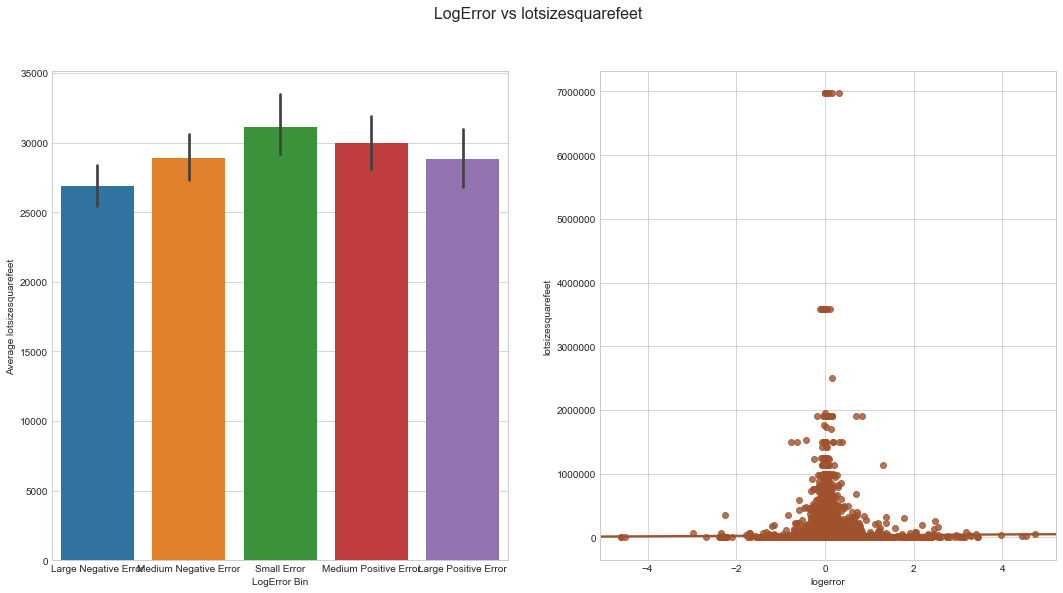

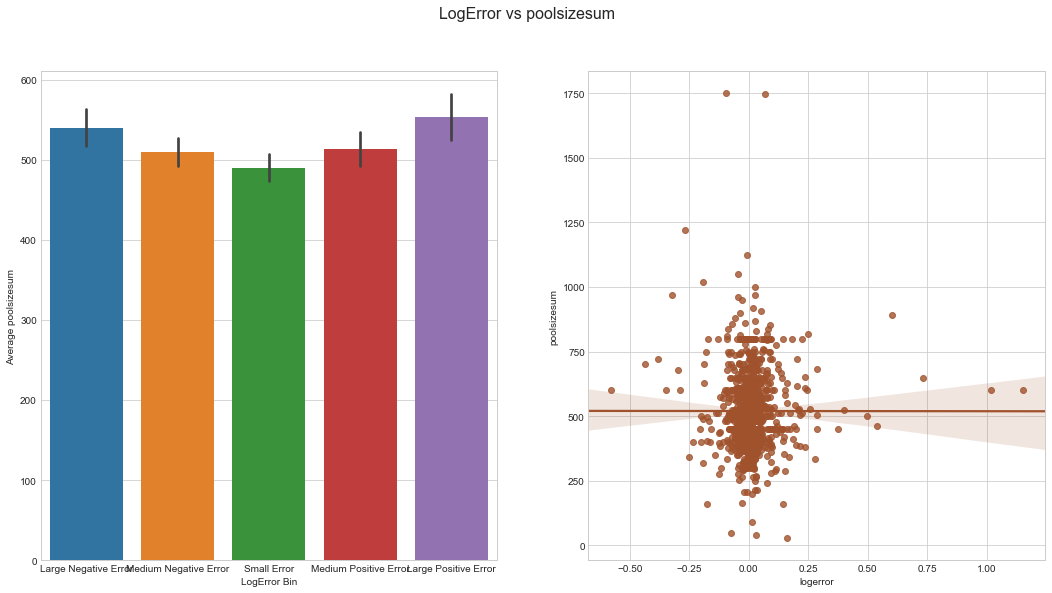

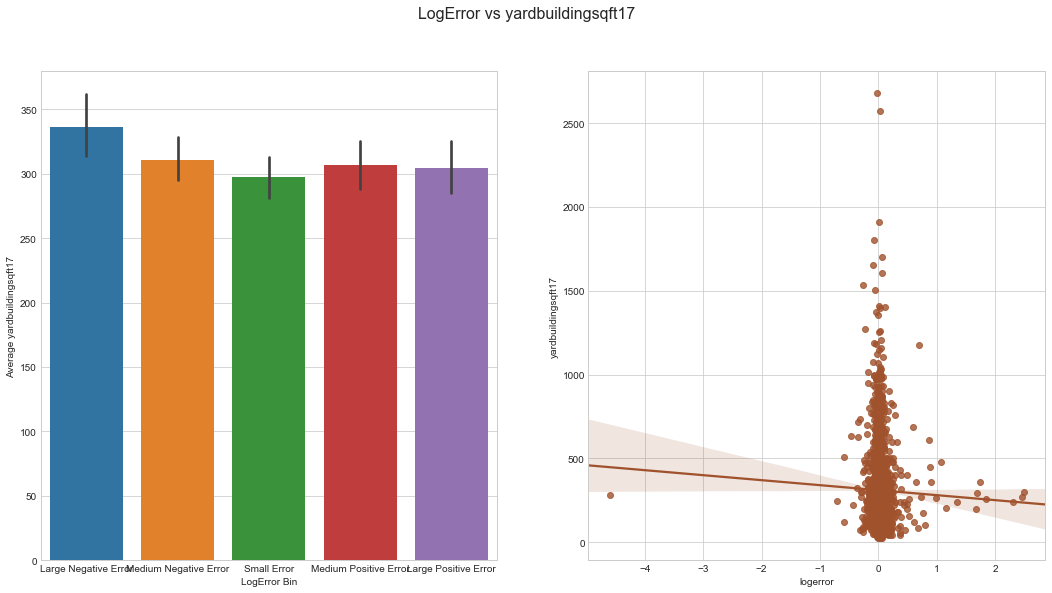

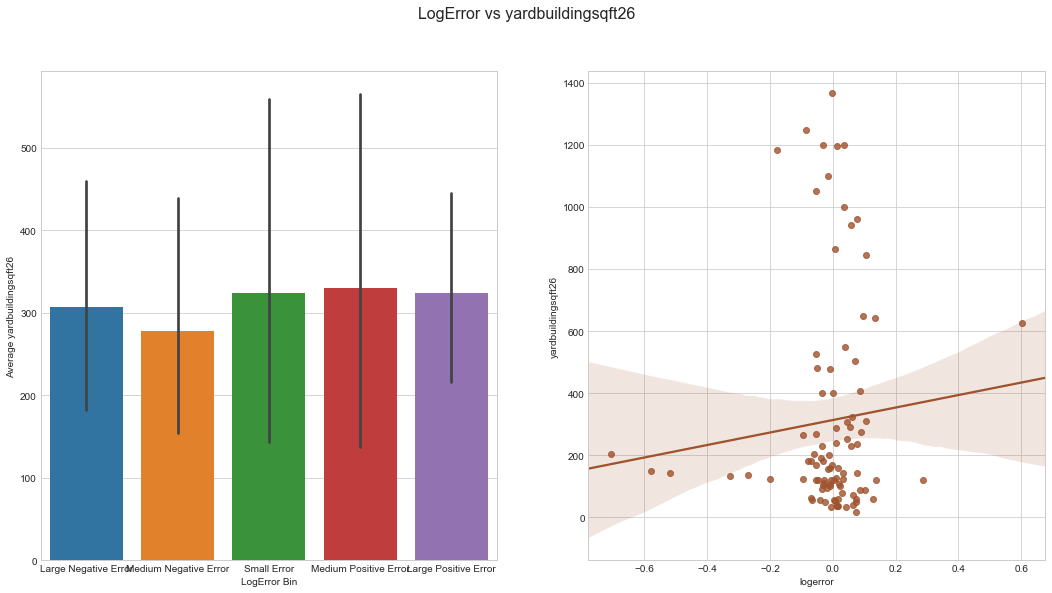

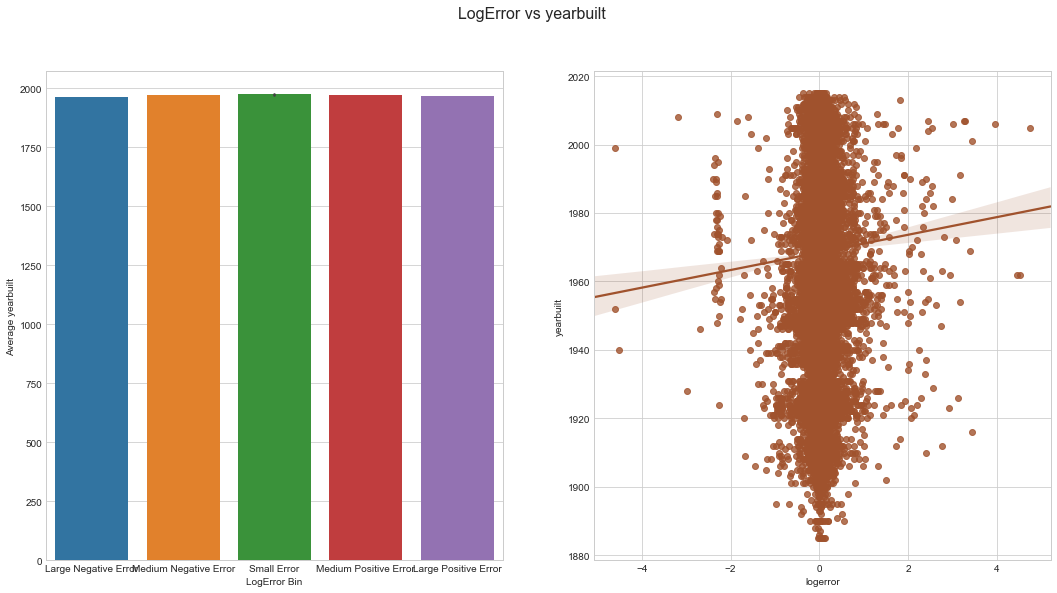

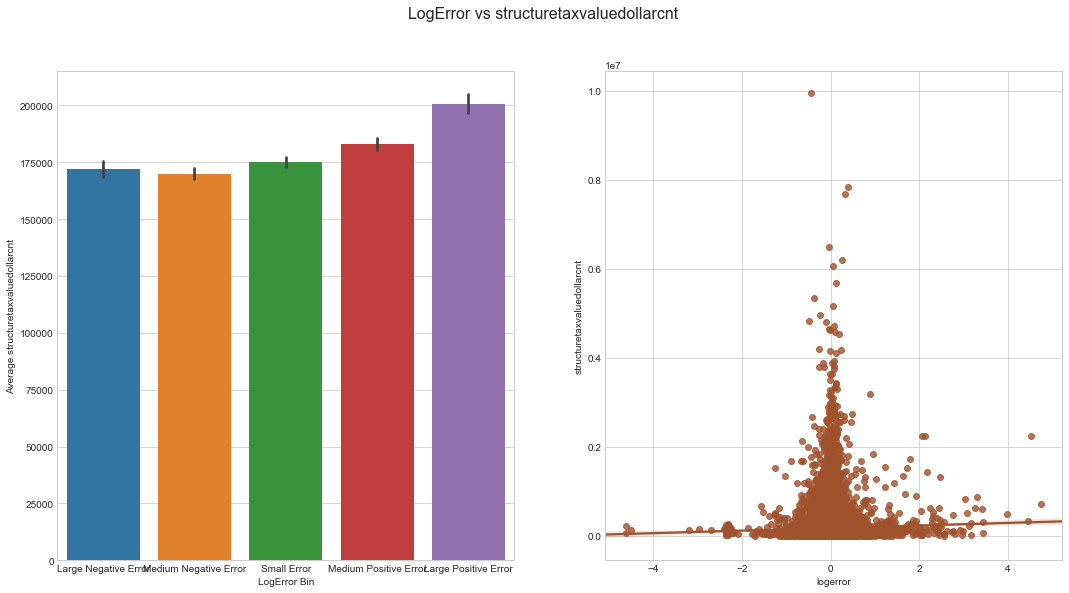

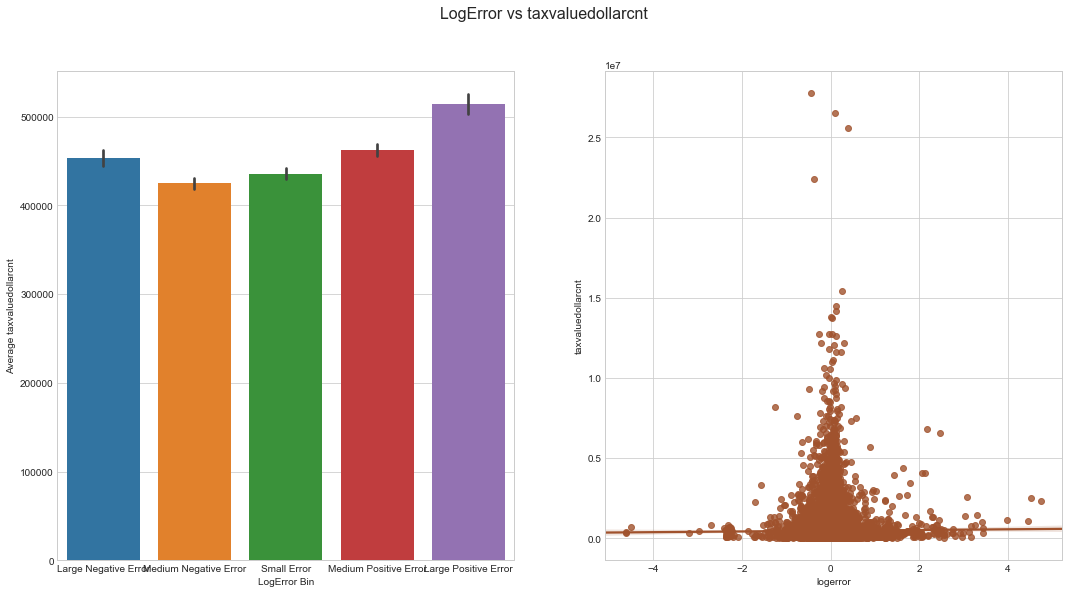

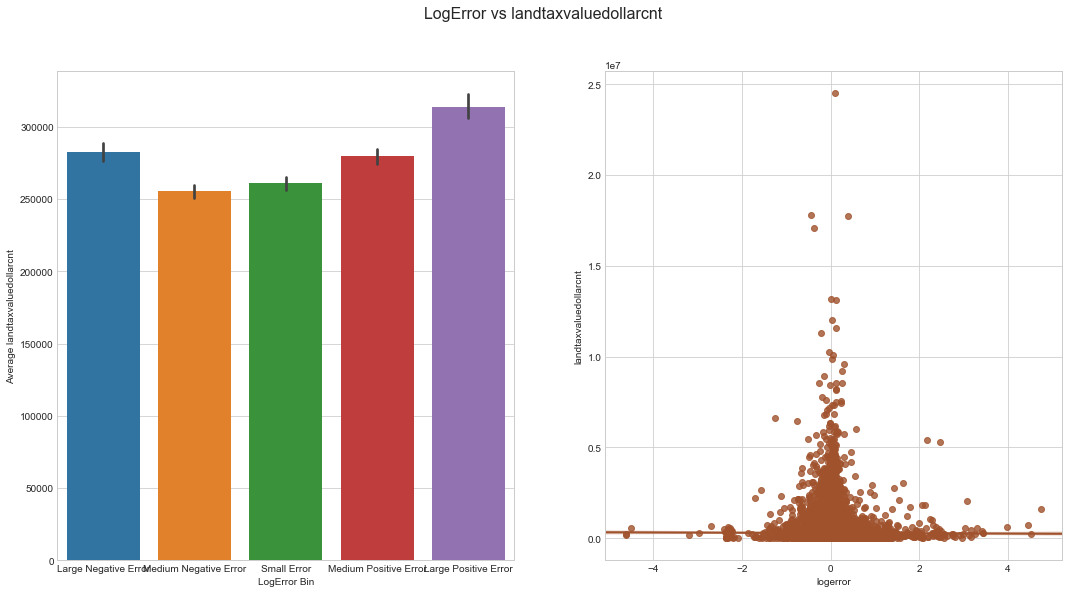

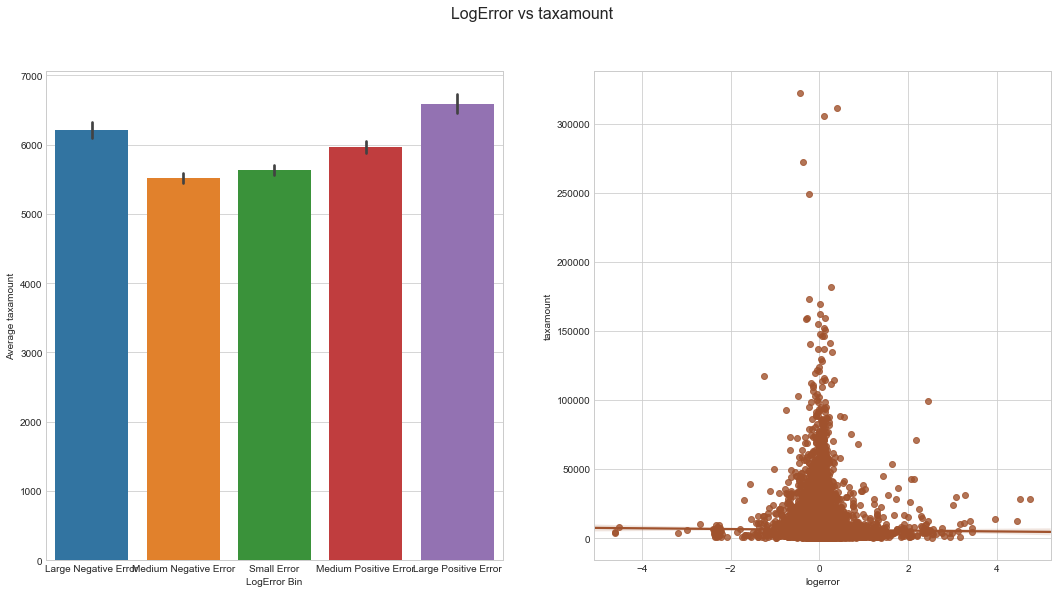

In [17]:
### Continuous variable vs logerror plots
for col in continuous:     
    fig = plt.figure(figsize=(18,9));
    sns.barplot(x='logerror_bin', y=col, data=data_sold, ax = plt.subplot(121),
                order=['Large Negative Error', 'Medium Negative Error','Small Error',
                       'Medium Positive Error', 'Large Positive Error']);
    plt.xlabel('LogError Bin');
    plt.ylabel('Average {}'.format(col));
    sns.regplot(x='logerror', y=col, data=data_sold, color='Sienna', ax = plt.subplot(122));
    plt.suptitle('LogError vs {}'.format(col), fontsize=16)   

## Supplemental figures

In [22]:
train_df = pd.read_csv("./input/train_2016_v2.csv", parse_dates=["transactiondate"])
train_df.shape

(90275, 3)

In [27]:
train_y = train_df['logerror'].values
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]

from sklearn import ensemble

In [28]:
import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(train_df, train_y, feature_names=train_df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields transactiondate

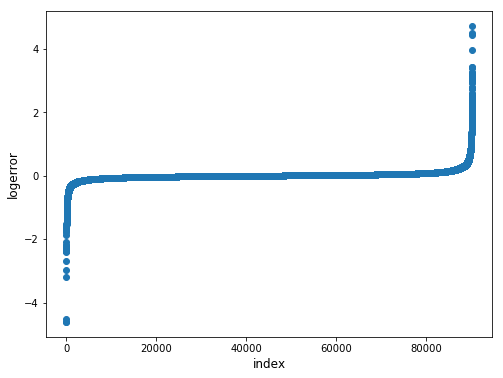

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

Distribution of Target Variable:

In [4]:
log_errors = train['logerror']
upper_lim = np.percentile(log_errors, 99.5)
lower_lim = np.percentile(log_errors, 0.5)
log_errors = log_errors.clip(lower=lower_lim, upper=upper_lim)

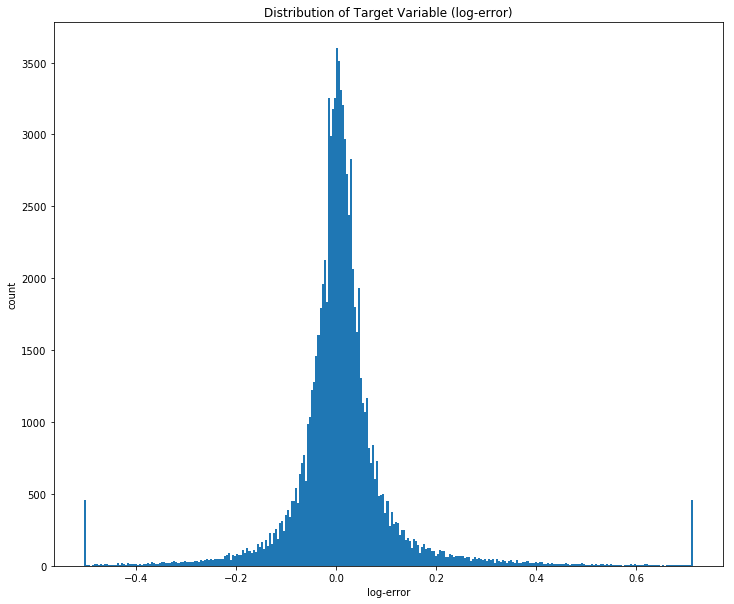

In [5]:
plt.figure(figsize=(12,10))
plt.hist(log_errors, bins=300)
plt.title('Distribution of Target Variable (log-error)')
plt.ylabel('count')
plt.xlabel('log-error')
plt.show()

Log-errors are close to normally distributed around a 0 mean, but with a slightly positive skew. There are also a considerable number of outliers, I will explore whether removing these improves model performance.

Proportion of Missing Values in Each Column:

In [6]:
#load property features/description file
prop = pd.read_csv("../input/properties_2016.csv")
print(prop.head())
print('---------------------')
print(prop.shape)

/Users/marskar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                    NaN                       NaN           NaN   
1  10759547                    NaN                       NaN           NaN   
2  10843547                    NaN                       NaN           NaN   
3  10859147                    NaN                       NaN           NaN   
4  10879947                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          0.0         0.0                  NaN                    NaN   
1          0.0         0.0                  NaN                    NaN   
2          0.0         0.0                  NaN                    NaN   
3          0.0         0.0                  3.0                    7.0   
4          0.0         0.0                  4.0                    NaN   

   calculatedbathnbr  decktypeid         ...           numberofstories  \
0           

# Analyse the Dimensions of our Datasets

In [21]:
     print("Training Size:" + str(train.shape))
     print("Property Size:" + str(prop.shape))

Training Size:(90275, 61)
Property Size:(2985217, 58)


In [7]:
### ... check for NaNs
nan = prop.isnull().sum()
nan

parcelid                              0
airconditioningtypeid           2173698
architecturalstyletypeid        2979156
basementsqft                    2983589
bathroomcnt                       11462
bedroomcnt                        11450
buildingclasstypeid             2972588
buildingqualitytypeid           1046729
calculatedbathnbr                128912
decktypeid                      2968121
finishedfloor1squarefeet        2782500
calculatedfinishedsquarefeet      55565
finishedsquarefeet12             276033
finishedsquarefeet13            2977545
finishedsquarefeet15            2794419
finishedsquarefeet50            2782500
finishedsquarefeet6             2963216
fips                              11437
fireplacecnt                    2672580
fullbathcnt                      128912
garagecarcnt                    2101950
garagetotalsqft                 2101950
hashottuborspa                  2916203
heatingorsystemtypeid           1178816
latitude                          11437


In [8]:
### Plotting NaN counts
nan_sorted = nan.sort_values(ascending=False).to_frame().reset_index()
nan_sorted.columns = ['Column', 'Number of NaNs']

In [9]:
import seaborn as sns

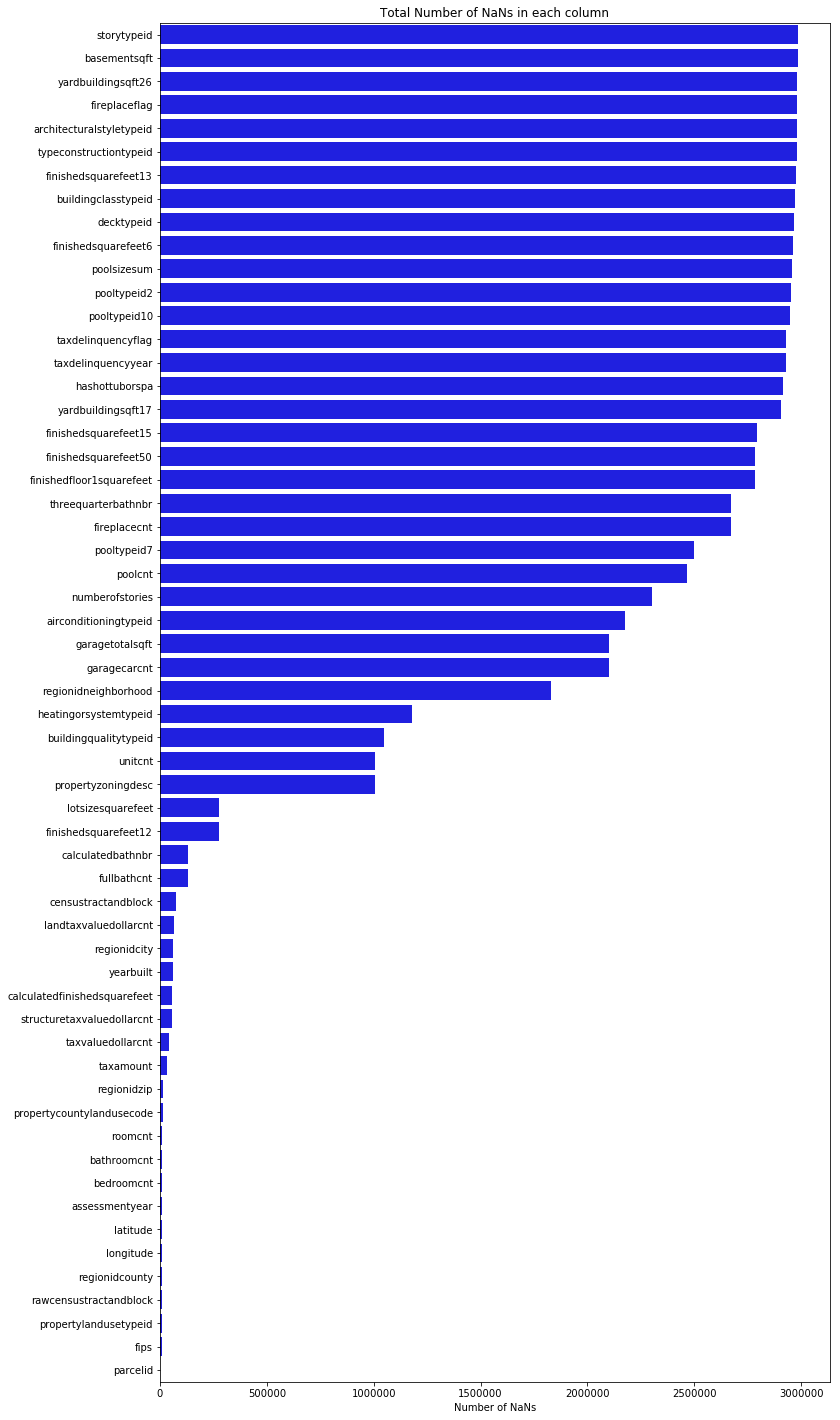

In [10]:
fig, ax = plt.subplots(figsize=(12, 25))
sns.barplot(x="Number of NaNs", y="Column", data=nan_sorted, color='Blue', ax=ax)
ax.set(xlabel="Number of NaNs", ylabel="", title="Total Number of NaNs in each column")
plt.show()

There are several columns which have a very high proportion of missing values. It may be worth analysing these more closely.

### Monthly Effects on Target Variable

In [11]:
train['transaction_month'] = pd.DatetimeIndex(train['transactiondate']).month
train.sort_values('transaction_month', axis=0, ascending=True, inplace=True)
print(train.head())

ax = sns.stripplot(x=train['transaction_month'], y=train['logerror'])

      parcelid  logerror transactiondate  transaction_month
0     11016594    0.0276      2016-01-01                  1
4392  12379107    0.0276      2016-01-22                  1
4391  12259947    0.0010      2016-01-22                  1
4390  17204079    0.0871      2016-01-22                  1
4389  12492292   -0.0212      2016-01-22                  1


For submission we are required to predict values for October, November and December. The differing distributions of the target variable over these months indicates that it may be useful to create an additional 'transaction_month' feature as shown above. Lets have a closer look at the distribution across only October, November and December.

In [12]:
ax1 = sns.stripplot(x=train['transaction_month'][train['transaction_month'] > 9], y=train['logerror'])

Proportion of Transactions in Each Month

    transaction_month  month
1            0.072623      1
2            0.070152      2
3            0.095840      3
4            0.103140      4
5            0.110341      5
6            0.120986      6
7            0.110186      7
8            0.116045      8
9            0.106065      9
10           0.055132     10
11           0.020227     11
12           0.019263     12


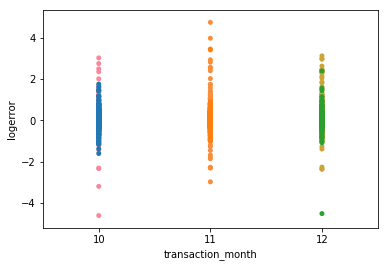

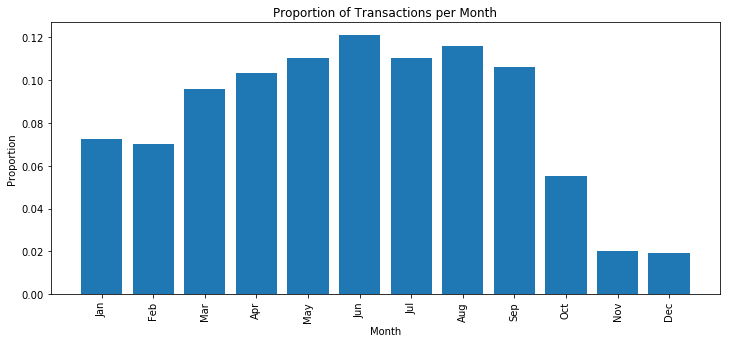

In [13]:
trans = train['transaction_month'].value_counts(normalize=True)
trans = pd.DataFrame(trans)
trans['month'] = trans.index
trans = trans.sort_values('month', ascending=True)
trans.set_index('month')
trans.rename({'transaction_month' : ''})
print(trans)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 5))
plt.bar(range(len(months)), trans['transaction_month'])
plt.title('Proportion of Transactions per Month')
plt.ylabel('Proportion')
plt.xlabel('Month')
plt.xticks(range(len(months)), months, rotation=90)
plt.show()

This datase contains more transactions occuring in the Spring and Summer months, although it must be noted that some transactions from October, November and December have been removed to form the competition's test set (thanks to nonrandom for pointing this out).

Feature Importance

In [14]:
#fill NaN values with -1 and encode object columns 
for x in prop.columns:
    prop[x] = prop[x].fillna(-1)

#many more parcelids in properties file, merge with training file
train = pd.merge(train, prop, on='parcelid', how='left')
print(train.head())
print('---------------------')
print(train.shape)

   parcelid  logerror transactiondate  transaction_month  \
0  11016594    0.0276      2016-01-01                  1   
1  12379107    0.0276      2016-01-22                  1   
2  12259947    0.0010      2016-01-22                  1   
3  17204079    0.0871      2016-01-22                  1   
4  12492292   -0.0212      2016-01-22                  1   

   airconditioningtypeid  architecturalstyletypeid  basementsqft  bathroomcnt  \
0                    1.0                      -1.0          -1.0          2.0   
1                   -1.0                      -1.0          -1.0          1.0   
2                   -1.0                      -1.0          -1.0          1.0   
3                   -1.0                      -1.0          -1.0          4.0   
4                    1.0                      -1.0          -1.0          1.0   

   bedroomcnt  buildingclasstypeid         ...           numberofstories  \
0         3.0                 -1.0         ...                      -1.0   


In [15]:
for c in train[['transactiondate', 'hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc', 'fireplaceflag', 'taxdelinquencyflag']]:
    label = LabelEncoder()
    label.fit(list(train[c].values))
    train[c] = label.transform(list(train[c].values))

x_train = train.drop(['parcelid', 'logerror', 'transactiondate'], axis=1)
y_train = train['logerror']

In [16]:
print(x_train.head())
print('------------')
print(y_train.head())

   transaction_month  airconditioningtypeid  architecturalstyletypeid  \
0                  1                    1.0                      -1.0   
1                  1                   -1.0                      -1.0   
2                  1                   -1.0                      -1.0   
3                  1                   -1.0                      -1.0   
4                  1                    1.0                      -1.0   

   basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0          -1.0          2.0         3.0                 -1.0   
1          -1.0          1.0         2.0                 -1.0   
2          -1.0          1.0         3.0                 -1.0   
3          -1.0          4.0         4.0                 -1.0   
4          -1.0          1.0         3.0                 -1.0   

   buildingqualitytypeid  calculatedbathnbr  decktypeid         ...           \
0                    4.0                2.0        -1.0         ...            
1         

In [17]:
rf = RandomForestRegressor(n_estimators=30, max_features=None)

rf.fit(x_train, y_train)

rf_importance = rf.feature_importances_


importance = pd.DataFrame()
importance['features'] = x_train.columns
importance['importance'] = rf_importance
print(importance.head())

                   features  importance
0         transaction_month    0.039308
1     airconditioningtypeid    0.006998
2  architecturalstyletypeid    0.000359
3              basementsqft    0.000310
4               bathroomcnt    0.007828


In [18]:
importance.sort_values('importance', axis=0, inplace=True, ascending=False)

print('------------')
print(importance.head())

------------
                      features  importance
50  structuretaxvaluedollarcnt    0.083723
25                   longitude    0.077608
54                   taxamount    0.075427
24                    latitude    0.074305
26           lotsizesquarefeet    0.071182


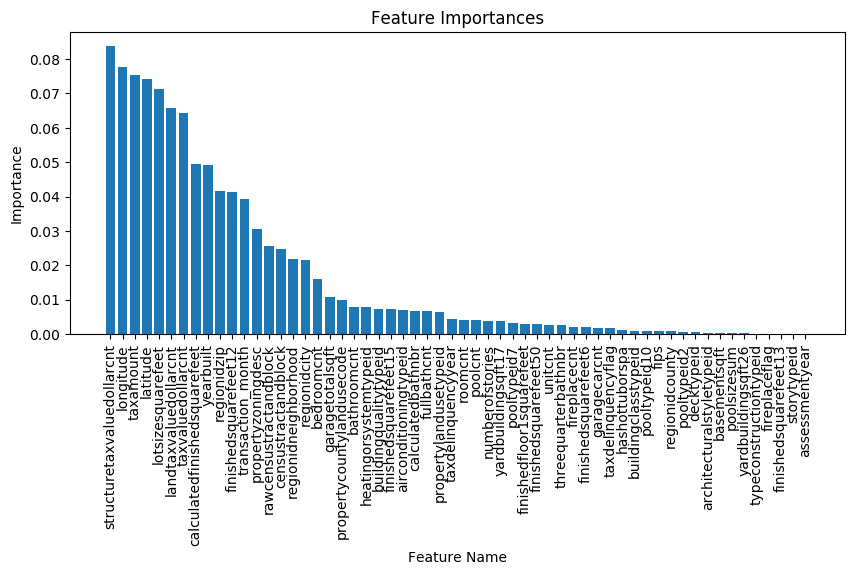

In [19]:
fig = plt.figure(figsize=(10, 4), dpi=100)
plt.bar(range(len(importance)), importance['importance'])
plt.title('Feature Importances')
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.xticks(range(len(importance)), importance['features'], rotation=90)
plt.show()

Here we see that the greatest importance in predicting the log-error comes from features involving taxes and geographical location of the property. Notably, the 'transaction_month' feature that was engineered earlier was the 12th most important feature. 

In [20]:
test= test.rename(columns={'ParcelId': 'parcelid'}) 
#To make it easier for merging datasets on same column_id later

NameError: name 'test' is not defined